In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
gfdl = pd.read_csv('../Resources/GFDL_SPEAR_FULL_LDC.csv')
gfdl

L              MON  LDC_SST_GFDL_SPEAR  LDC_SST_GFDL_SPEAR_ONETWO  \
0      1.5  0000 1 Jan 1991            26.55804                   25.49000   
1      2.5  0000 1 Jan 1991            26.91037                   25.65075   
2      3.5  0000 1 Jan 1991            27.27886                   24.75944   
3      4.5  0000 1 Jan 1991            27.33729                   23.42220   
4      5.5  0000 1 Jan 1991            26.99391                   22.20774   
...    ...              ...                 ...                        ...   
3595   6.5  0000 1 Dec 2020            27.05779                   22.91640   
3596   7.5  0000 1 Dec 2020            26.45643                   21.83344   
3597   8.5  0000 1 Dec 2020            25.88036                   21.09882   
3598   9.5  0000 1 Dec 2020            25.57233                   20.86703   
3599  10.5  0000 1 Dec 2020            25.44613                   21.11743   

      LDC_SST_GFDL_SPEAR_THREE  LDC_SST_GFDL_SPEAR_FOUR  
0                     26.11018                 28.04140  
1                     26.65816                 28.03729  
2                     26.79709                 28.24893  
3                     26.46144                 28.41844  
4                     25.76022                 28.34974  
...                        ...                      ...  
3595                  25.85047                 28.38735  
3596                  25.02918                 28.11666  
3597                  24.38621                 27.79587  
3598                  24.14325                 27.55117  
3599                  24.14560                 27.37498  

[3600 rows x 6 columns]

In [51]:
gfdl['MON'] = pd.to_datetime(gfdl['MON'], format = '%H%M %d %b %Y')
gfdl['START'] = gfdl['MON'].dt.month
gfdl['TARGET'] = ((gfdl['START'] + gfdl['L']).astype(int))%12
gfdl['TARGET'] = gfdl['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START' - Nino3.4
gfdl_mean = gfdl.groupby(['L', 'START'])['LDC_SST_GFDL_SPEAR'].mean().reset_index()
gfdl_mean.rename(columns={'LDC_SST_GFDL_SPEAR': 'MEAN_SST_GFDL_SPEAR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3.4
gfdl_var = gfdl.groupby(['L', 'START'])['LDC_SST_GFDL_SPEAR'].var().reset_index()
gfdl_var.rename(columns={'LDC_SST_GFDL_SPEAR': 'VAR_SST_GFDL_SPEAR'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino1+2
gfdl_mean_onetwo = gfdl.groupby(['L', 'START'])['LDC_SST_GFDL_SPEAR_ONETWO'].mean().reset_index()
gfdl_mean_onetwo.rename(columns={'LDC_SST_GFDL_SPEAR_ONETWO': 'MEAN_SST_GFDL_SPEAR_ONETWO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino1+2
gfdl_var_onetwo = gfdl.groupby(['L', 'START'])['LDC_SST_GFDL_SPEAR_ONETWO'].var().reset_index()
gfdl_var_onetwo.rename(columns={'LDC_SST_GFDL_SPEAR_ONETWO': 'VAR_SST_GFDL_SPEAR_ONETWO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino3
gfdl_mean_three = gfdl.groupby(['L', 'START'])['LDC_SST_GFDL_SPEAR_THREE'].mean().reset_index()
gfdl_mean_three.rename(columns={'LDC_SST_GFDL_SPEAR_THREE': 'MEAN_SST_GFDL_SPEAR_THREE'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3
gfdl_var_three = gfdl.groupby(['L', 'START'])['LDC_SST_GFDL_SPEAR_THREE'].var().reset_index()
gfdl_var_three.rename(columns={'LDC_SST_GFDL_SPEAR_THREE': 'VAR_SST_GFDL_SPEAR_THREE'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino4
gfdl_mean_four = gfdl.groupby(['L', 'START'])['LDC_SST_GFDL_SPEAR_FOUR'].mean().reset_index()
gfdl_mean_four.rename(columns={'LDC_SST_GFDL_SPEAR_FOUR': 'MEAN_SST_GFDL_SPEAR_FOUR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino4
gfdl_var_four = gfdl.groupby(['L', 'START'])['LDC_SST_GFDL_SPEAR_FOUR'].var().reset_index()
gfdl_var_four.rename(columns={'LDC_SST_GFDL_SPEAR_FOUR': 'VAR_SST_GFDL_SPEAR_FOUR'}, inplace=True)

# Merge the mean and variance DataFrames
dfs = [gfdl_mean, gfdl_var,gfdl_mean_onetwo, gfdl_var_onetwo, gfdl_mean_three, gfdl_var_three, gfdl_mean_four, gfdl_var_four]
gfdl_stat = reduce(lambda left, right: pd.merge(left, right, on=['L', 'START']), dfs)
gfdl_stat

L  START  MEAN_SST_GFDL_SPEAR  VAR_SST_GFDL_SPEAR  \
0     1.5      1            26.730966            0.586198   
1     1.5      2            27.219343            0.350295   
2     1.5      3            27.700019            0.219369   
3     1.5      4            27.778266            0.121108   
4     1.5      5            27.458359            0.171726   
..    ...    ...                  ...                 ...   
115  10.5      8            27.063226            0.234518   
116  10.5      9            26.551078            0.209246   
117  10.5     10            26.115971            0.235266   
118  10.5     11            25.949336            0.246216   
119  10.5     12            25.933564            0.308880   

     MEAN_SST_GFDL_SPEAR_ONETWO  VAR_SST_GFDL_SPEAR_ONETWO  \
0                     25.979638                   0.357964   
1                     26.326895                   0.359253   
2                     25.643214                   0.473376   
3                     24.430450                   0.842295   
4                     23.237966                   1.147971   
..                          ...                        ...   
115                   22.834014                   0.507439   
116                   21.726895                   0.307037   
117                   21.025533                   0.384822   
118                   20.781225                   0.321545   
119                   21.074116                   0.332481   

     MEAN_SST_GFDL_SPEAR_THREE  VAR_SST_GFDL_SPEAR_THREE  \
0                    26.370009                  0.625309   
1                    27.048718                  0.415907   
2                    27.380241                  0.258118   
3                    27.104430                  0.201826   
4                    26.420442                  0.322418   
..                         ...                       ...   
115                  25.913820                  0.299097   
116                  25.141851                  0.215859   
117                  24.628546                  0.247013   
118                  24.463252                  0.247043   
119                  24.517411                  0.283026   

     MEAN_SST_GFDL_SPEAR_FOUR  VAR_SST_GFDL_SPEAR_FOUR  
0                   28.087537                 0.386829  
1                   28.269656                 0.241667  
2                   28.604104                 0.188554  
3                   28.747332                 0.133107  
4                   28.671299                 0.155934  
..                        ...                      ...  
115                 28.364218                 0.235133  
116                 28.198871                 0.216735  
117                 27.969411                 0.227540  
118                 27.880232                 0.239703  
119                 27.804294                 0.310467  

[120 rows x 10 columns]

In [52]:
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
gfdl_stat['TARGET'] = ((gfdl_stat['START'] + gfdl_stat['L']).astype(int))%12
gfdl_stat['TARGET'] = gfdl_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
gfdl_stat['SZN'] = gfdl_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_GFDL_SPEAR','VAR_SST_GFDL_SPEAR',
             'MEAN_SST_GFDL_SPEAR_ONETWO','VAR_SST_GFDL_SPEAR_ONETWO',
             'MEAN_SST_GFDL_SPEAR_THREE','VAR_SST_GFDL_SPEAR_THREE',
             'MEAN_SST_GFDL_SPEAR_FOUR','VAR_SST_GFDL_SPEAR_FOUR' ]
gfdl_stat = gfdl_stat[new_order]

gfdl_stat.to_csv('../Resources/gfdl_stat.csv', index=False)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
gfdl_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl
    
gfdl_stat_dfs['lead1']

L  START  TARGET  SZN  MEAN_SST_GFDL_SPEAR  VAR_SST_GFDL_SPEAR  \
0   1.5      1       2  JFM            26.730966            0.586198   
1   1.5      2       3  FMA            27.219343            0.350295   
2   1.5      3       4  MAM            27.700019            0.219369   
3   1.5      4       5  AMJ            27.778266            0.121108   
4   1.5      5       6  MJJ            27.458359            0.171726   
5   1.5      6       7  JJA            26.974693            0.323565   
6   1.5      7       8  JAS            26.671186            0.512346   
7   1.5      8       9  ASO            26.597937            0.654803   
8   1.5      9      10  SON            26.690056            0.811620   
9   1.5     10      11  OND            26.661196            0.978329   
10  1.5     11      12  NDJ            26.540862            0.964540   
11  1.5     12       1  DJF            26.476125            0.864874   

    MEAN_SST_GFDL_SPEAR_ONETWO  VAR_SST_GFDL_SPEAR_ONETWO  \
0                    25.979638                   0.357964   
1                    26.326895                   0.359253   
2                    25.643214                   0.473376   
3                    24.430450                   0.842295   
4                    23.237966                   1.147971   
5                    21.990734                   0.984383   
6                    21.213922                   0.905035   
7                    20.965738                   0.920961   
8                    21.323451                   0.729949   
9                    22.066752                   0.859135   
10                   23.299217                   0.821609   
11                   24.718734                   0.661348   

    MEAN_SST_GFDL_SPEAR_THREE  VAR_SST_GFDL_SPEAR_THREE  \
0                   26.370009                  0.625309   
1                   27.048718                  0.415907   
2                   27.380241                  0.258118   
3                   27.104430                  0.201826   
4                   26.420442                  0.322418   
5                   25.617086                  0.496223   
6                   25.161049                  0.629033   
7                   24.990717                  0.755537   
8                   25.092754                  0.842289   
9                   25.201379                  1.084657   
10                  25.363734                  1.038086   
11                  25.678048                  0.917243   

    MEAN_SST_GFDL_SPEAR_FOUR  VAR_SST_GFDL_SPEAR_FOUR  
0                  28.087537                 0.386829  
1                  28.269656                 0.241667  
2                  28.604104                 0.188554  
3                  28.747332                 0.133107  
4                  28.671299                 0.155934  
5                  28.476304                 0.200178  
6                  28.356804                 0.349455  
7                  28.425006                 0.492428  
8                  28.560566                 0.571811  
9                  28.526364                 0.642044  
10                 28.346189                 0.661746  
11                 28.150973                 0.538472

In [53]:
obs = pd.read_csv('../Resources/monthly_obs.csv')
obs

MON  NINO1+2_L3   NINO3_L3  NINO3.4_L3   NINO4_L3  SZN  VARIANCE_1+2_L3  \
0     2   25.717667  26.422444   26.859889  28.279111  JFM         0.633224   
1     3   26.041222  27.063111   27.284667  28.381778  FMA         0.687875   
2     4   25.479778  27.345222   27.678333  28.621556  MAM         0.969434   
3     5   24.358667  27.150444   27.826222  28.837556  AMJ         1.243217   
4     6   23.166333  26.558444   27.651111  28.928111  MJJ         1.278459   
5     7   22.029889  25.847444   27.291667  28.885333  JJA         1.215305   
6     8   21.230444  25.274778   26.955667  28.816111  JAS         1.155230   
7     9   20.918111  25.000333   26.763333  28.770111  ASO         1.097573   
8    10   21.135889  24.995222   26.712556  28.739667  SON         1.217331   
9    11   21.832889  25.104667   26.672667  28.665667  OND         1.309250   
10   12   23.010222  25.322111   26.598889  28.500333  NDJ         1.201736   
11    1   24.495222  25.772667   26.648667  28.370222  DJF         0.822973   

    VARIANCE_3_L3  VARIANCE3.4_L3  VARIANCE4_L3  
0        0.722083        0.911147      0.602424  
1        0.438982        0.569984      0.483076  
2        0.314258        0.338432      0.351696  
3        0.300520        0.256750      0.272307  
4        0.356976        0.281245      0.238351  
5        0.489432        0.401165      0.252990  
6        0.671820        0.576438      0.303363  
7        0.879021        0.797956      0.397474  
8        1.143673        1.057599      0.521443  
9        1.366630        1.304206      0.646976  
10       1.389889        1.402310      0.710849  
11       1.095406        1.230987      0.681446

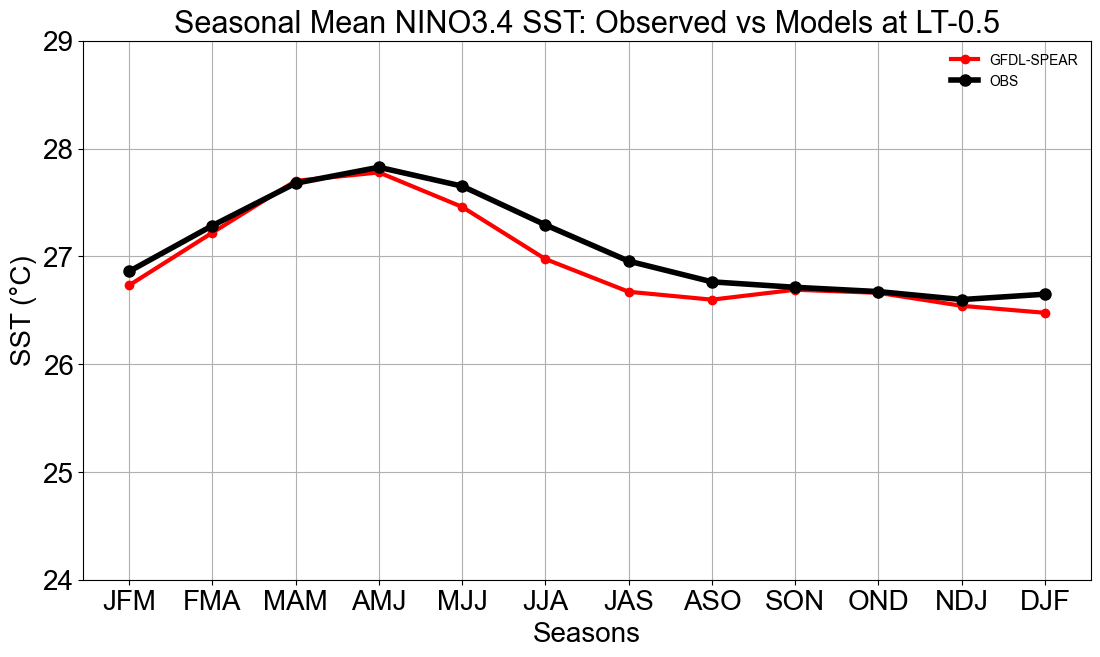

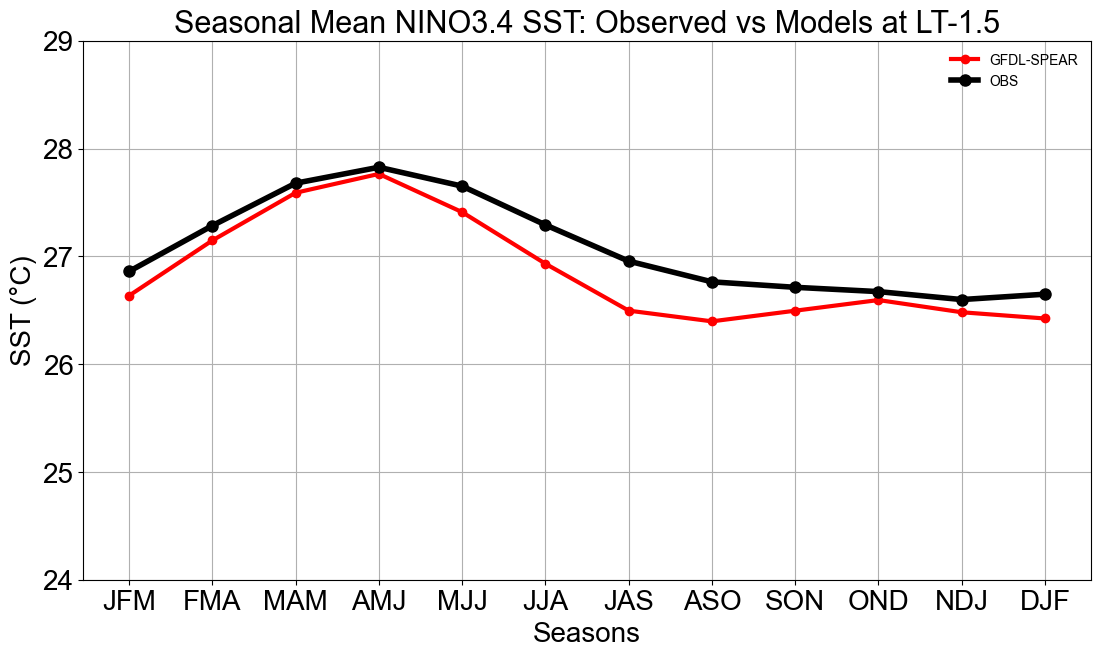

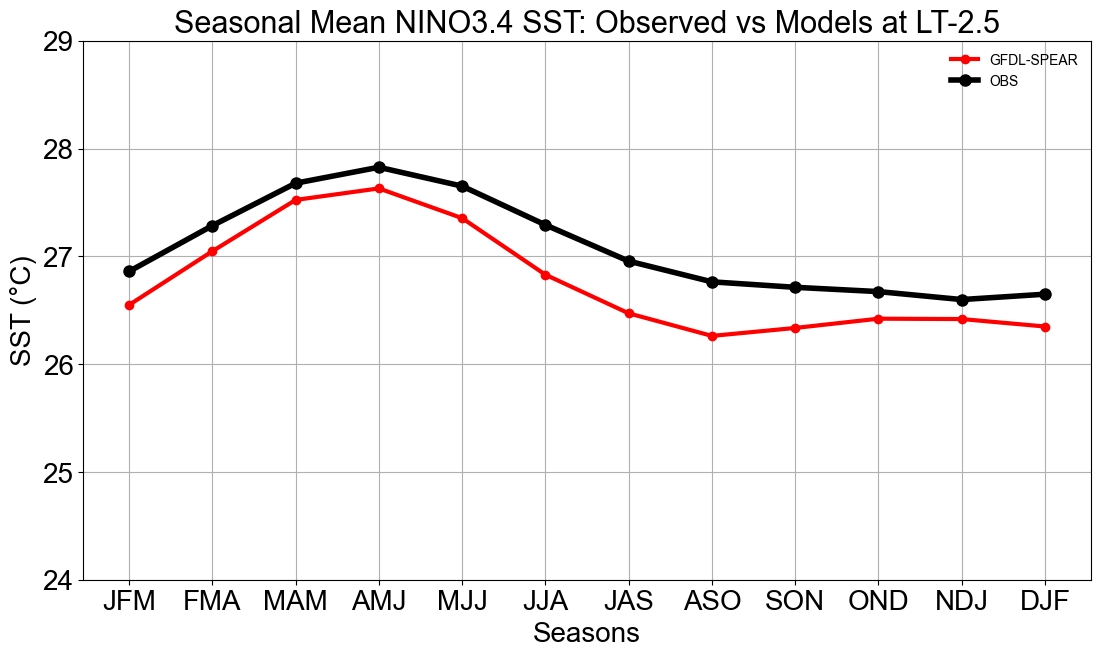

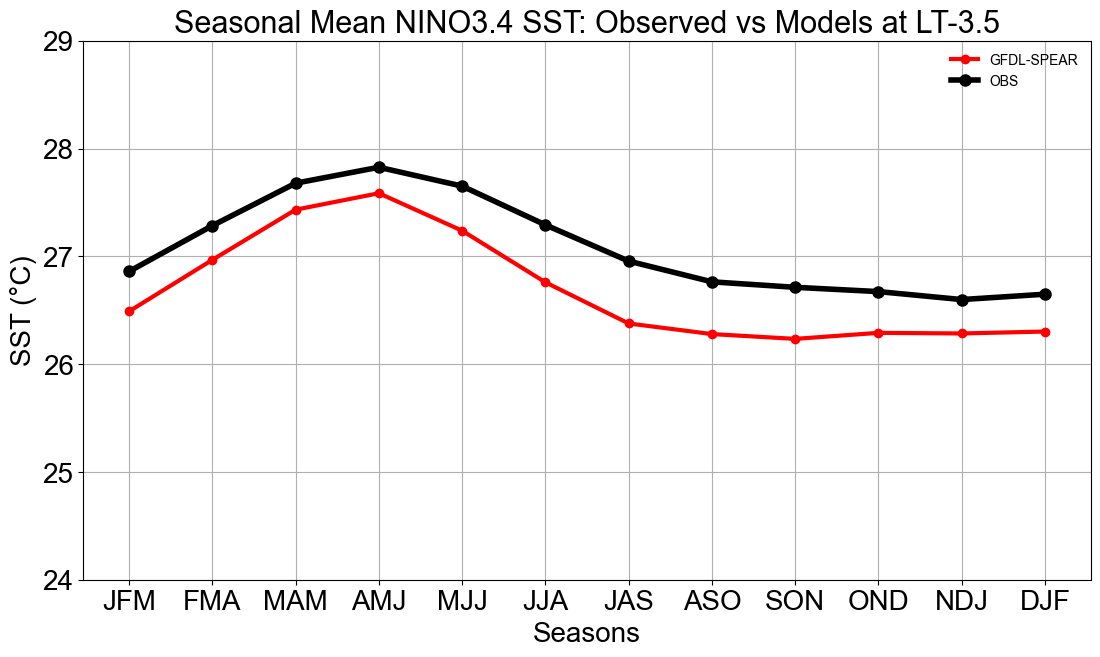

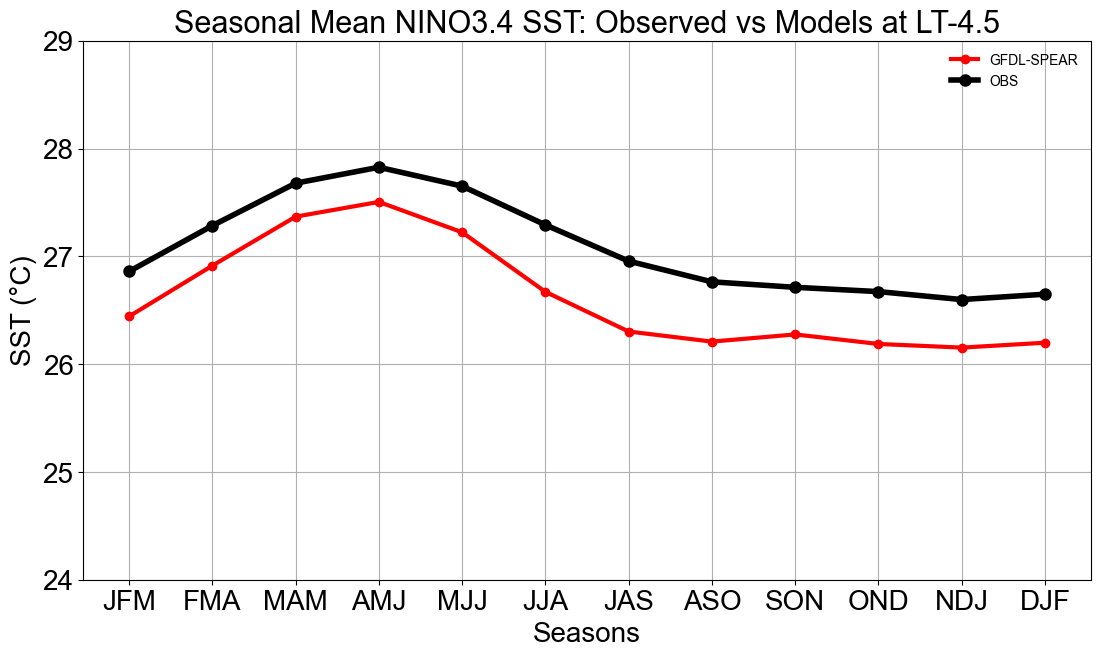

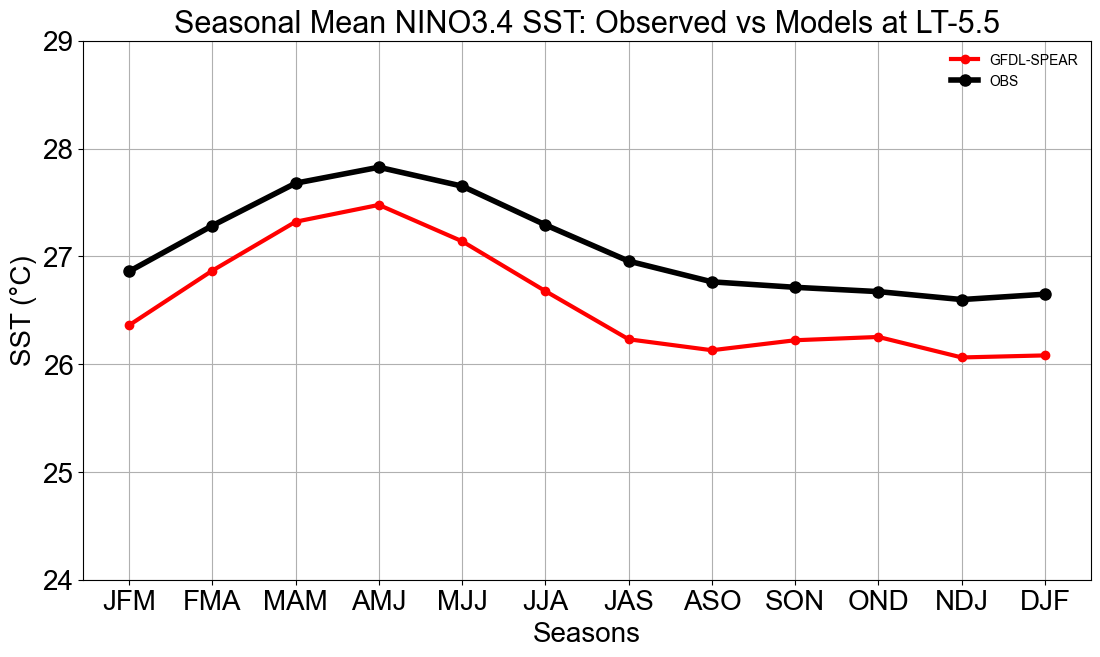

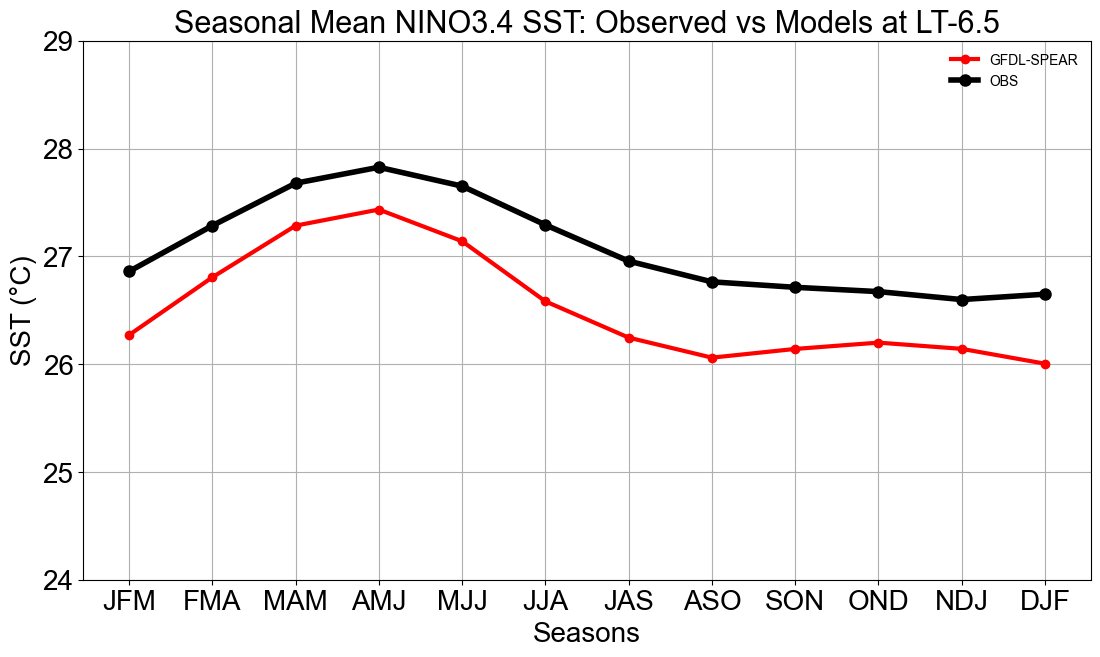

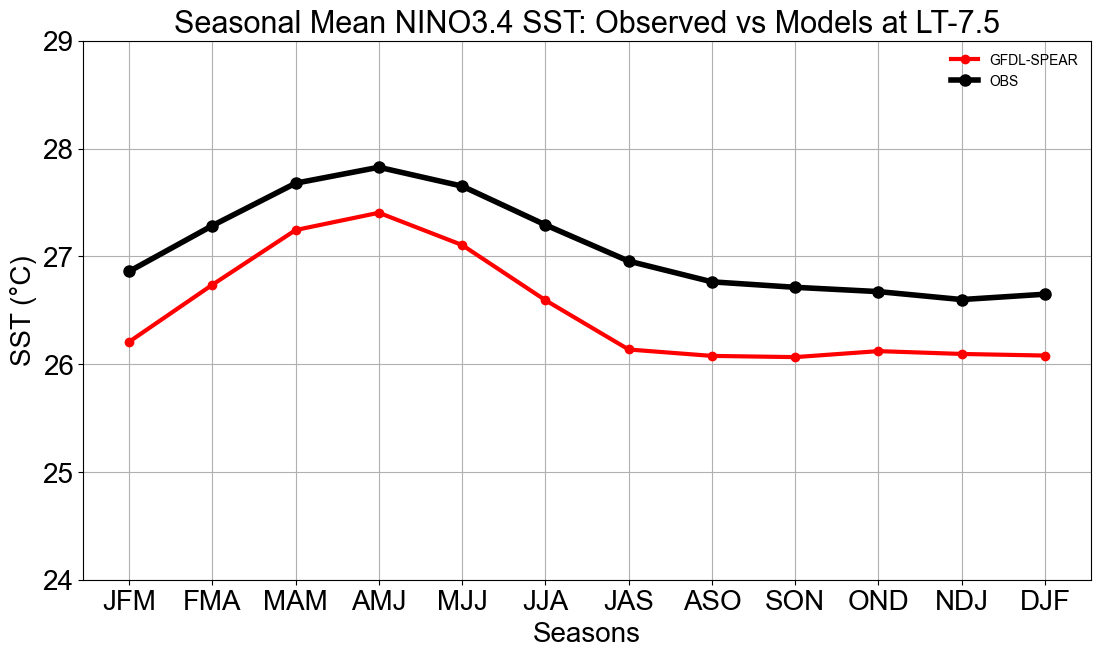

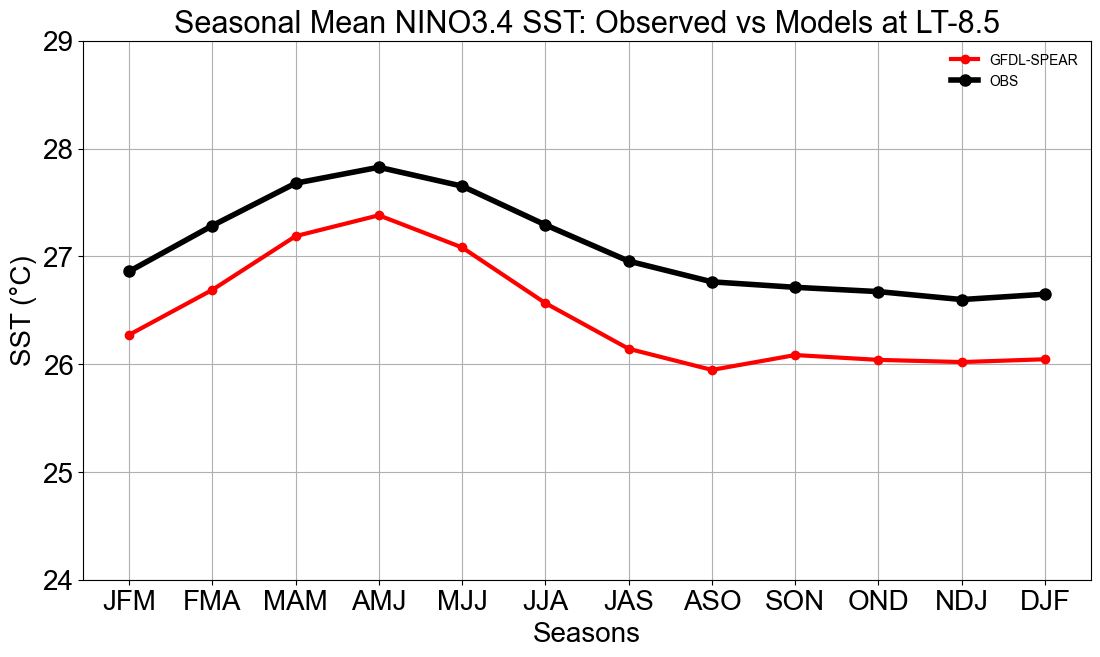

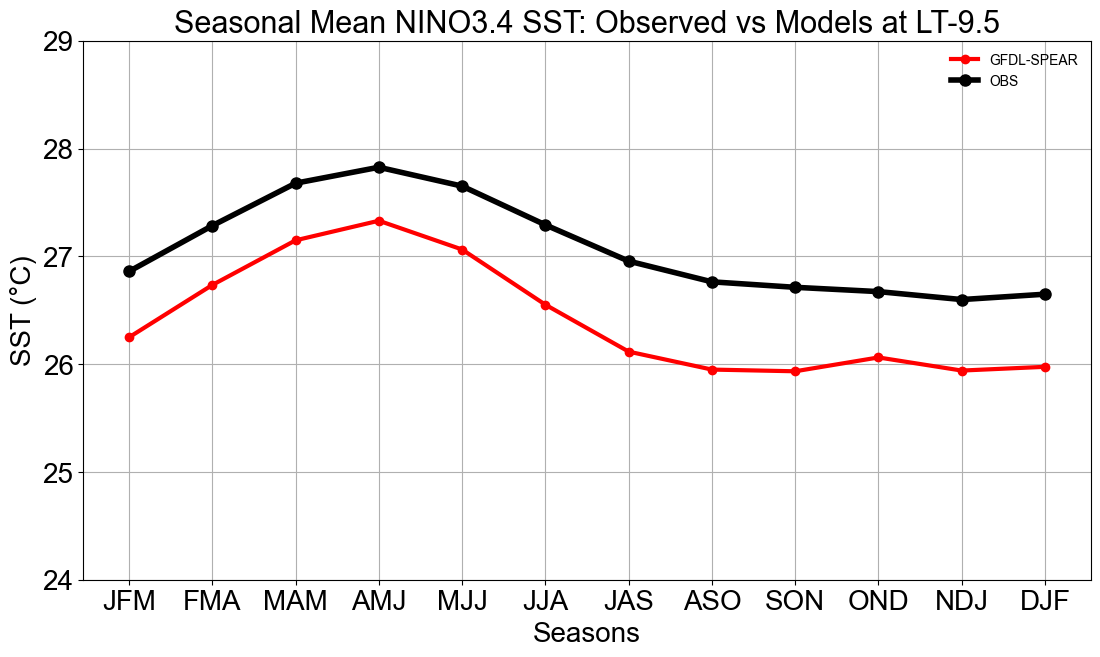

In [54]:
#GFDL-SPEAR: LT:1-10
#regions = ['1+2','3','3.4','4']


def multimodel_nino3_4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
i = 1
while i < 11:
    multimodel_nino3_4_visualizer('3.4', i)
    i += 1

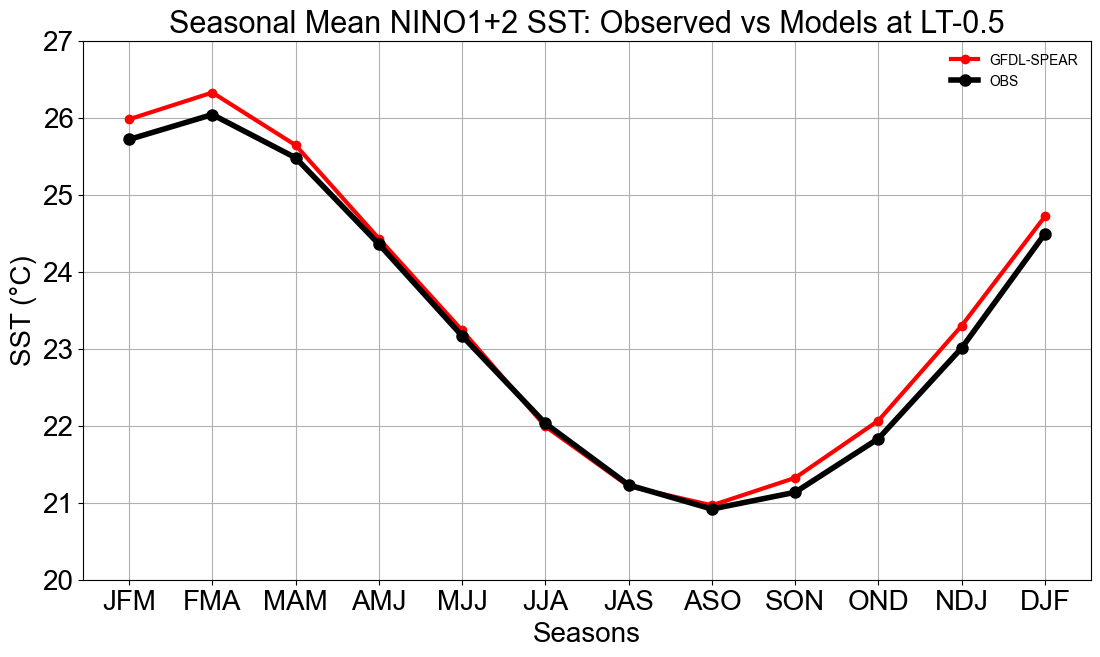

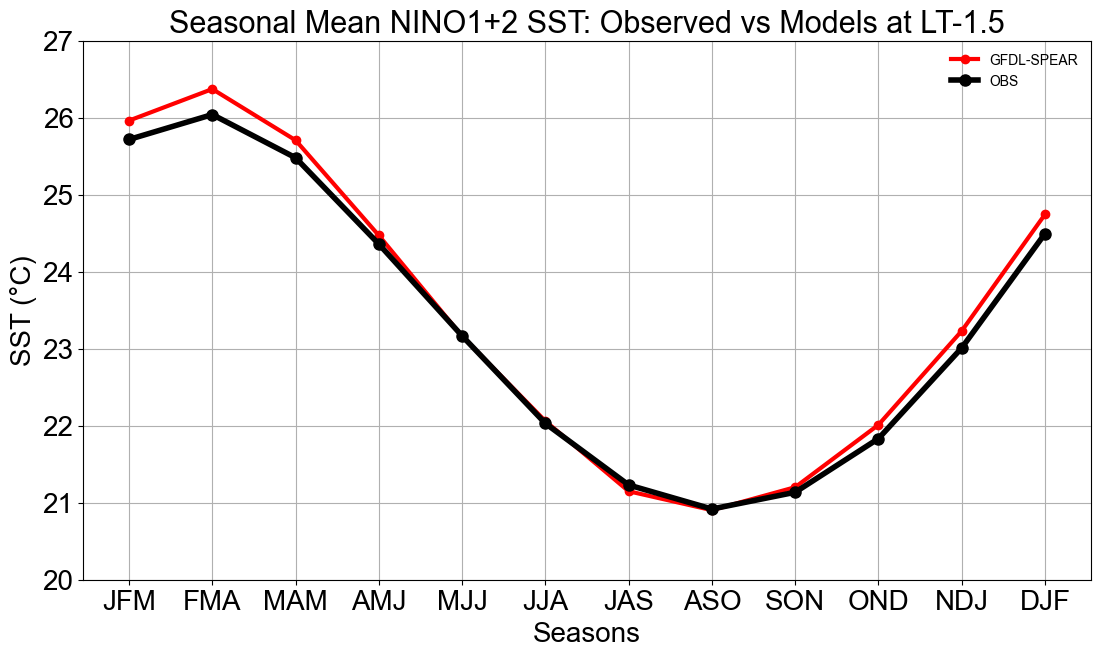

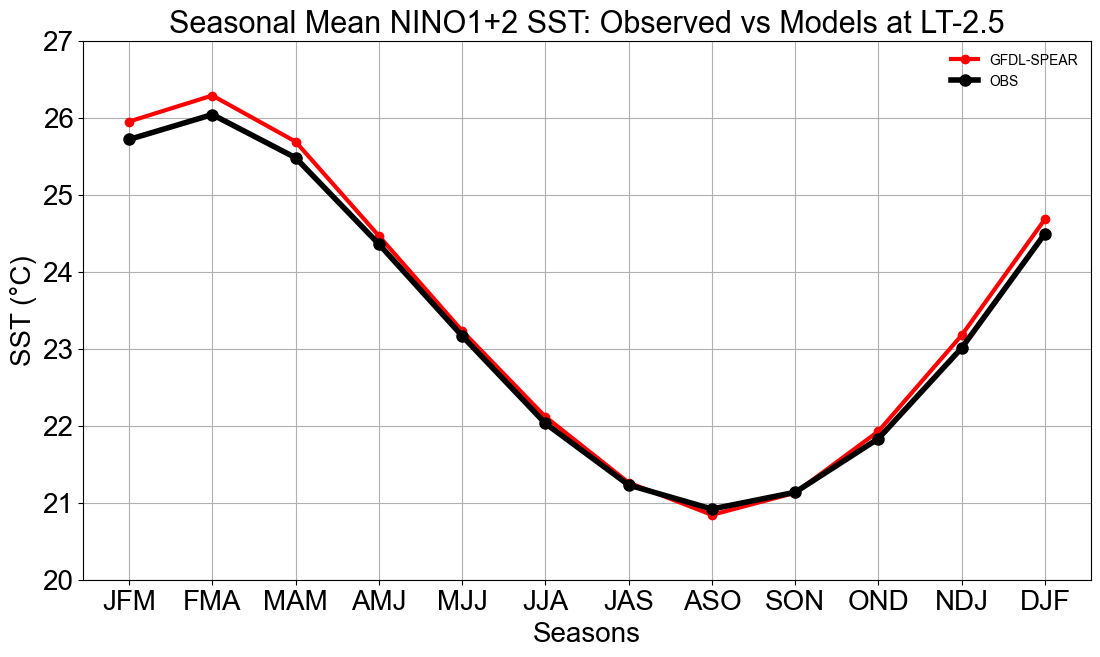

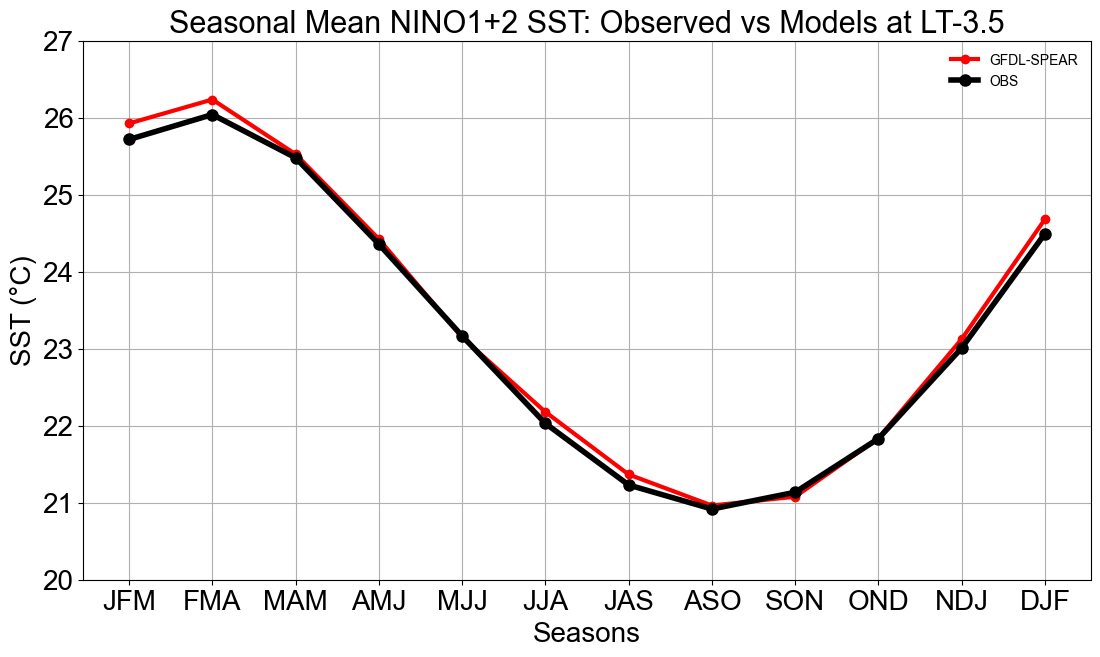

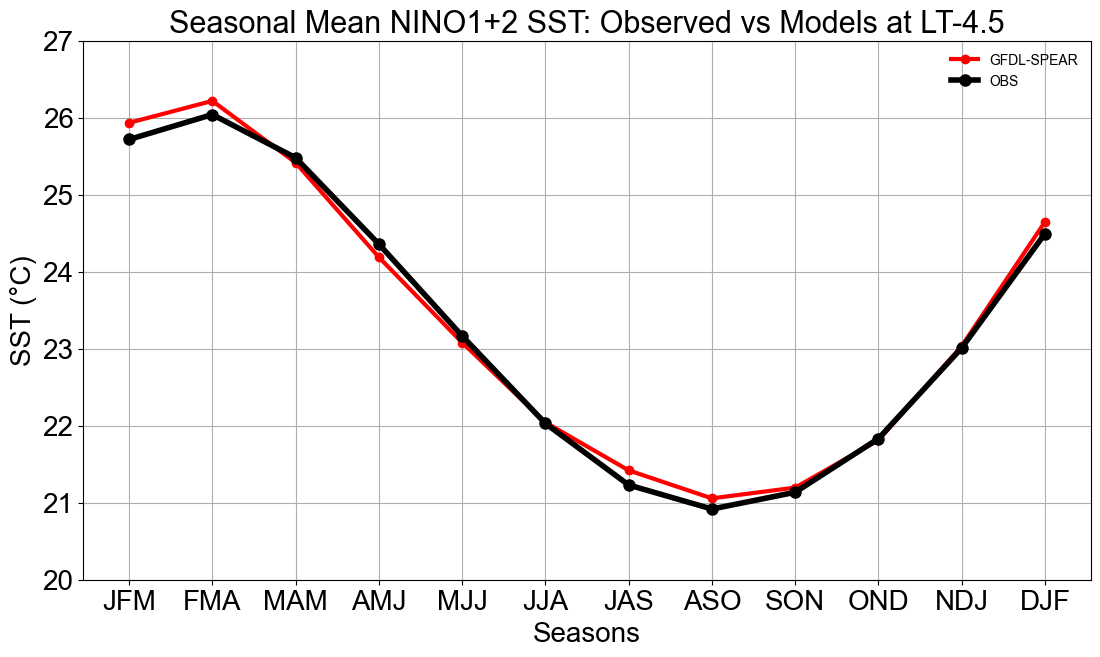

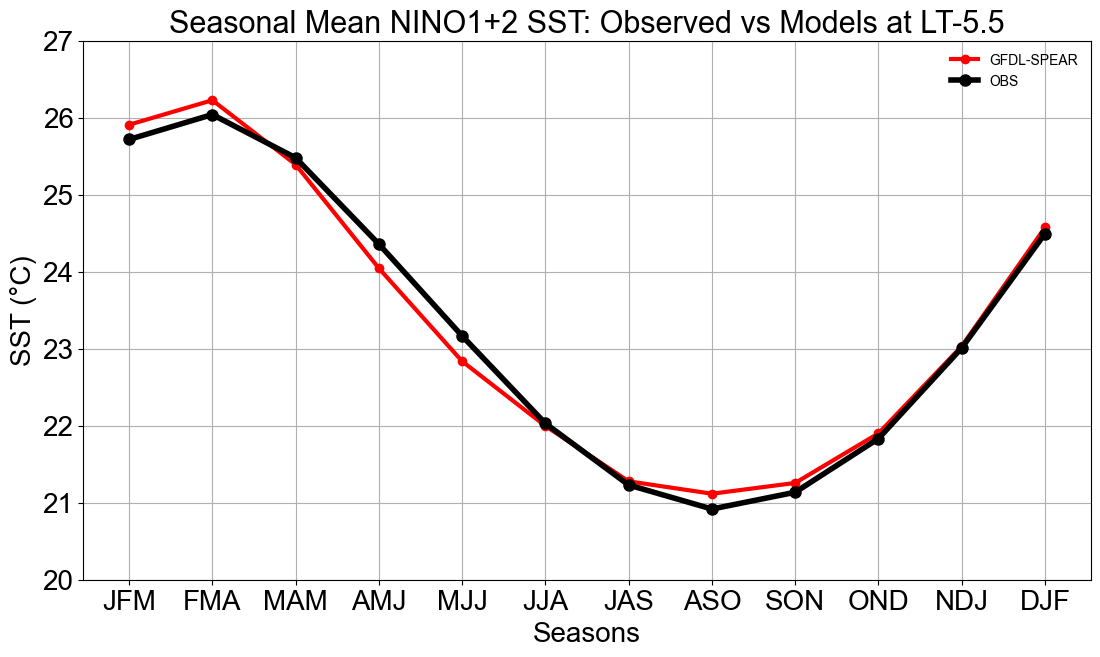

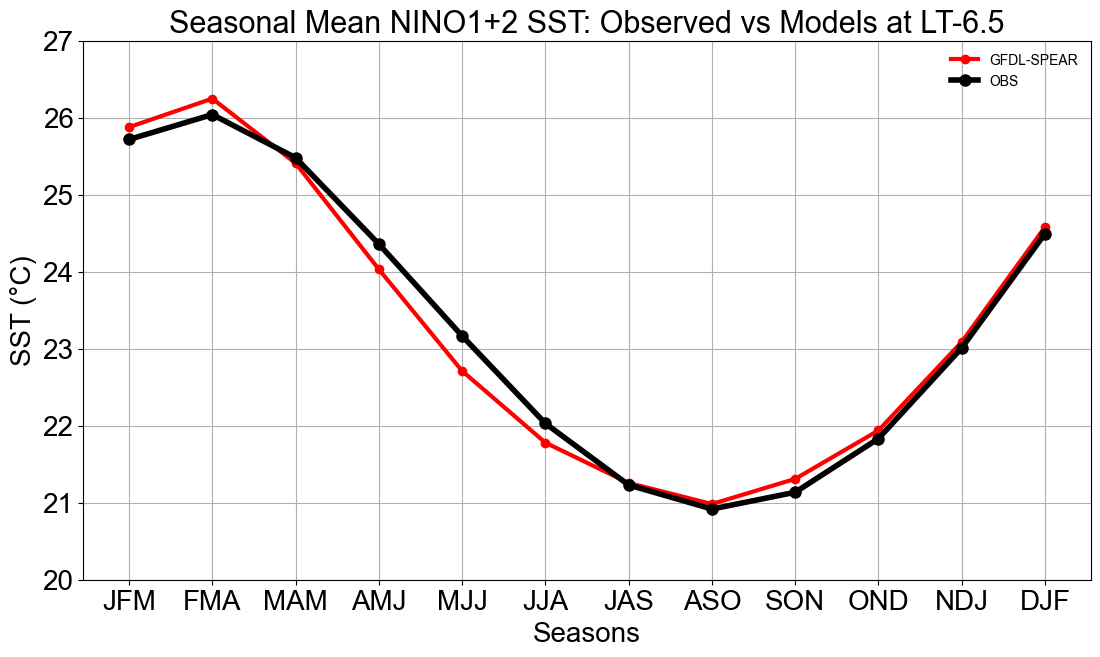

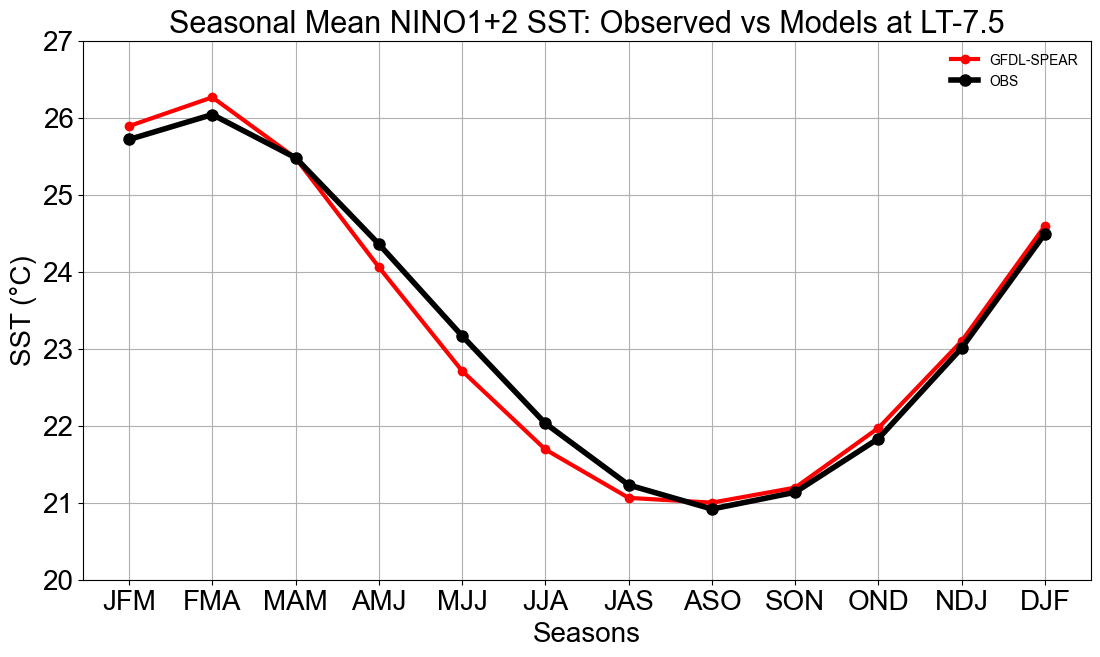

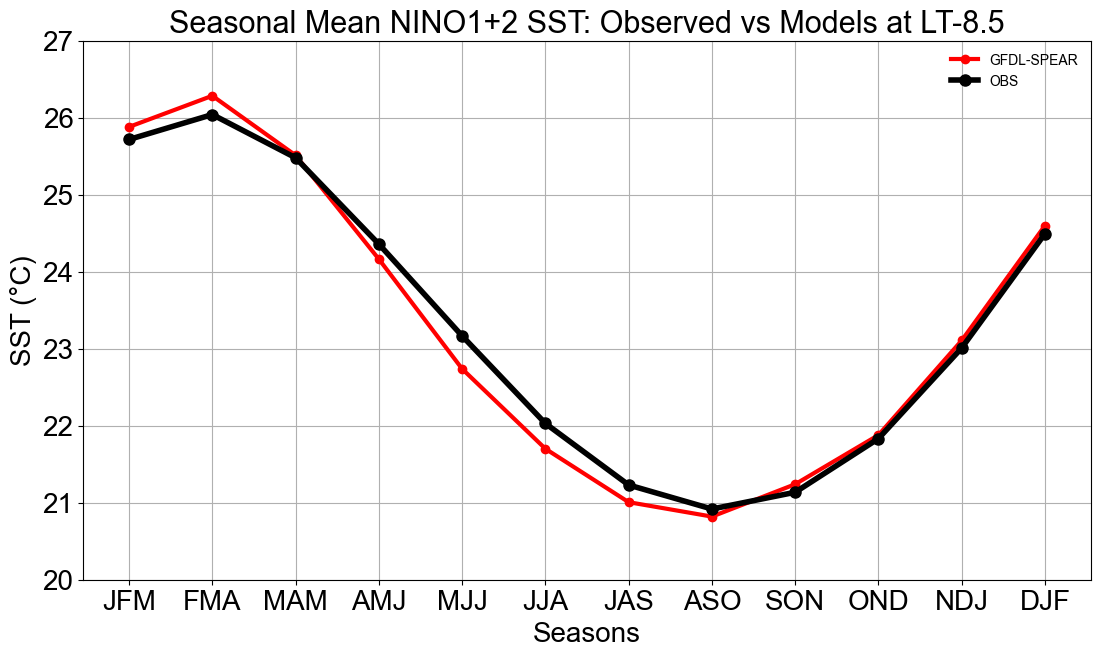

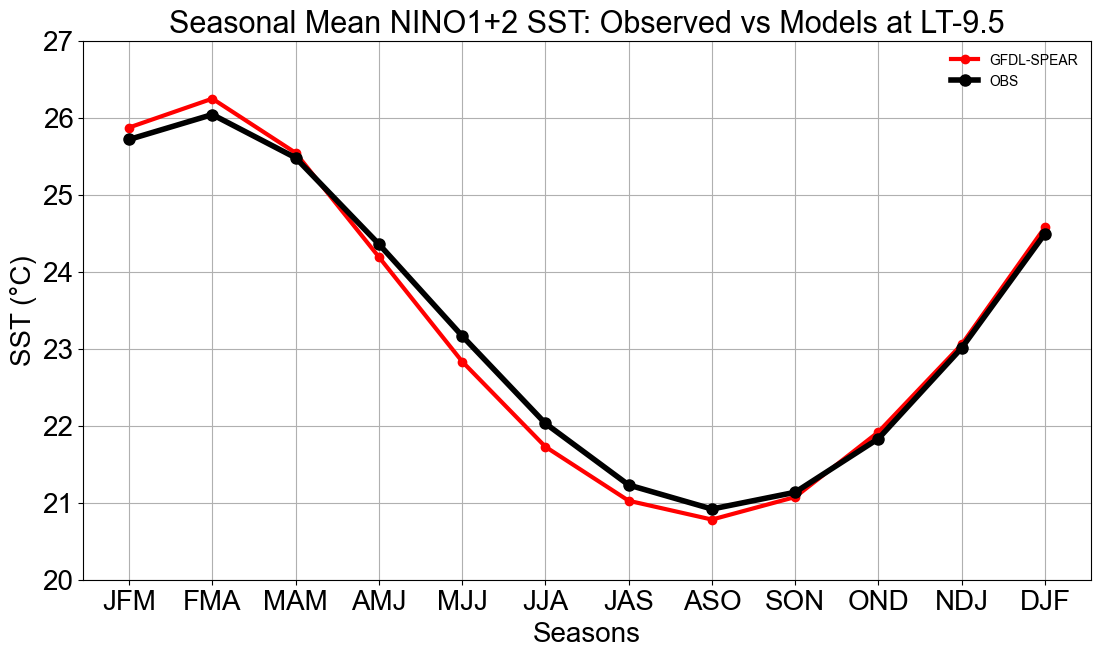

In [55]:
def multimodel_nino1_2_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=20, ymax=27)
    plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
i = 1
while i < 11:
    multimodel_nino1_2_visualizer('1+2', i)
    i += 1

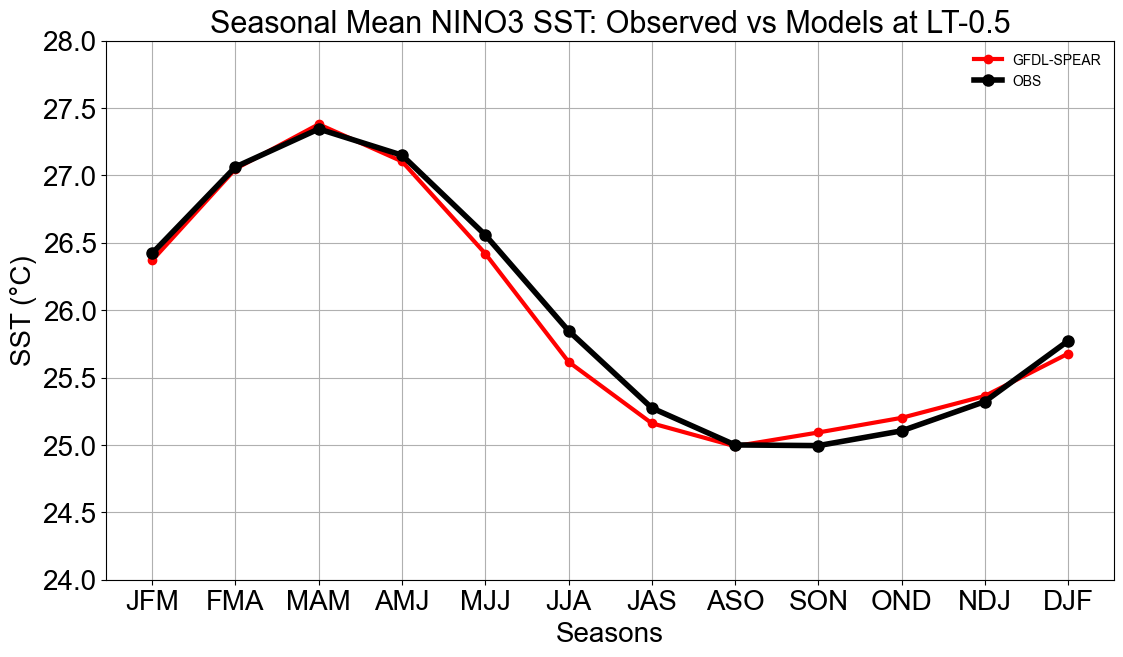

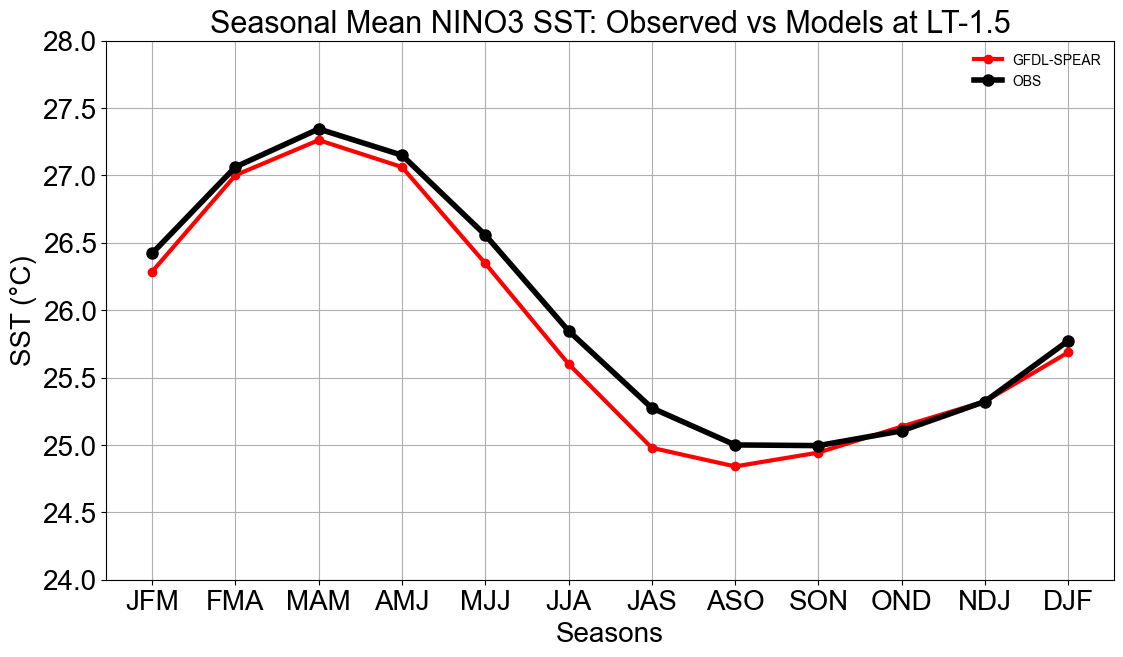

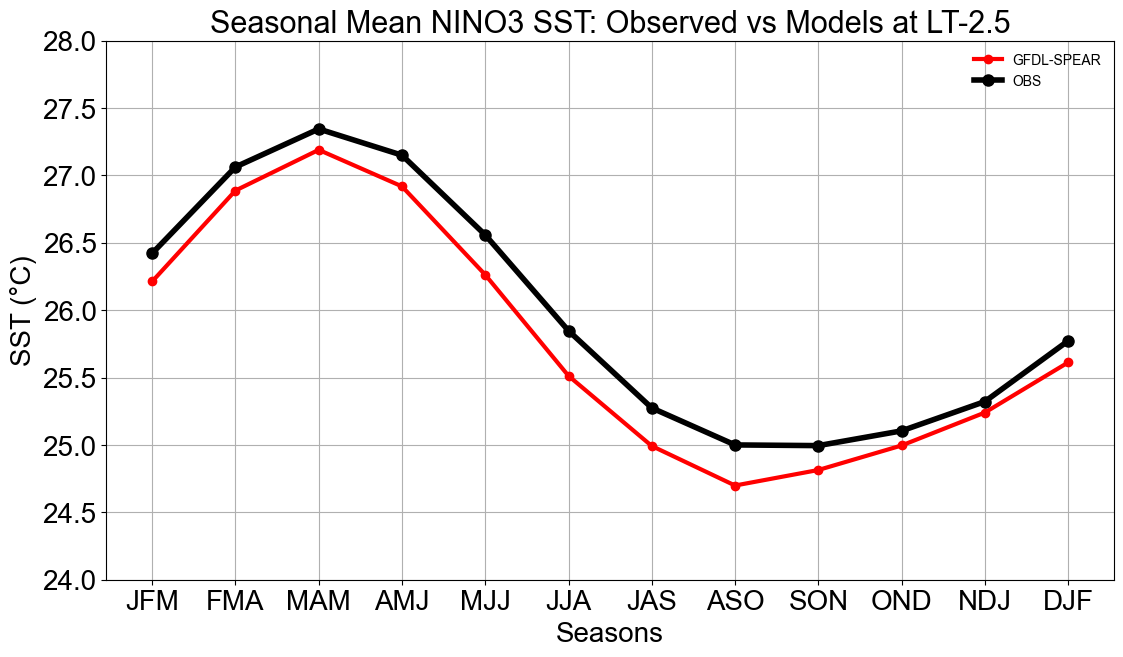

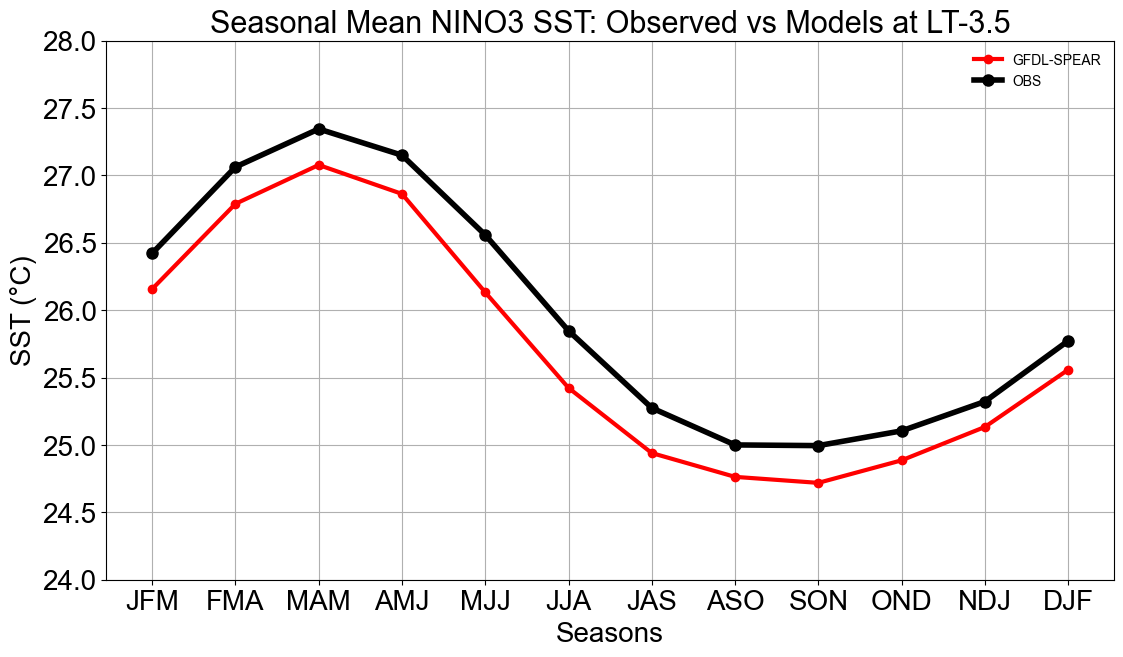

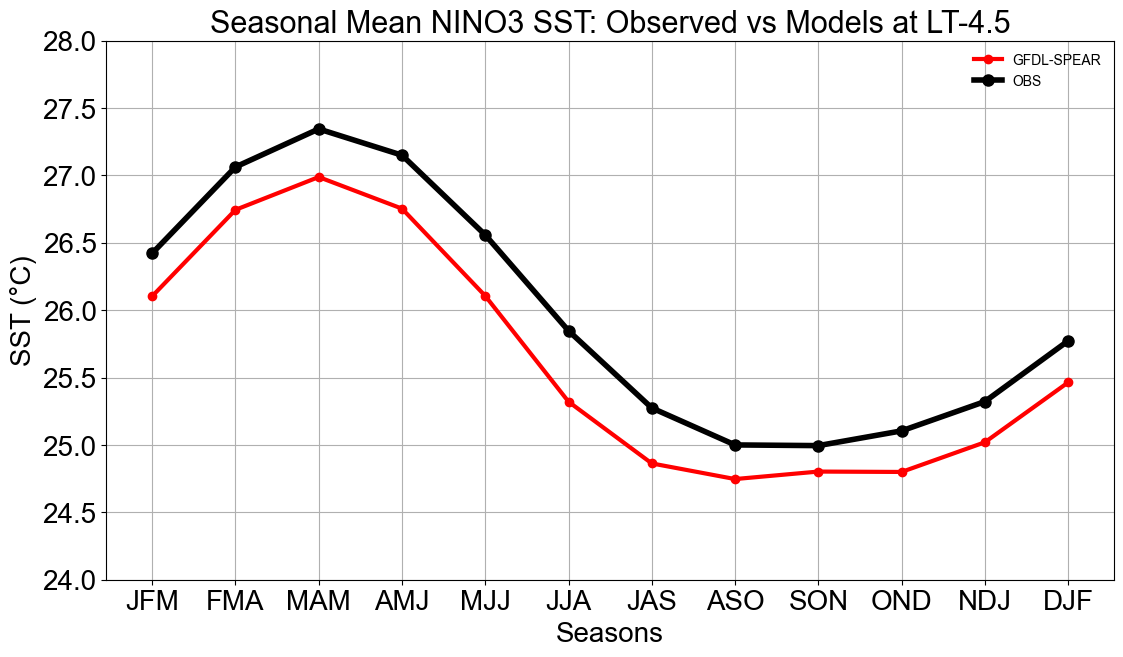

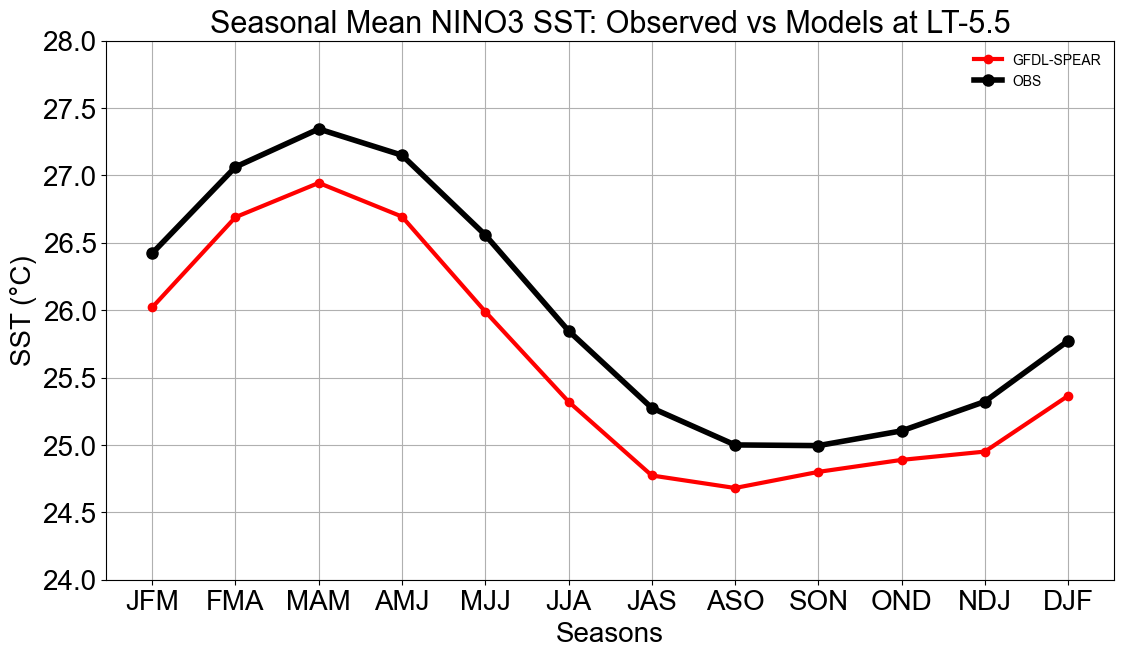

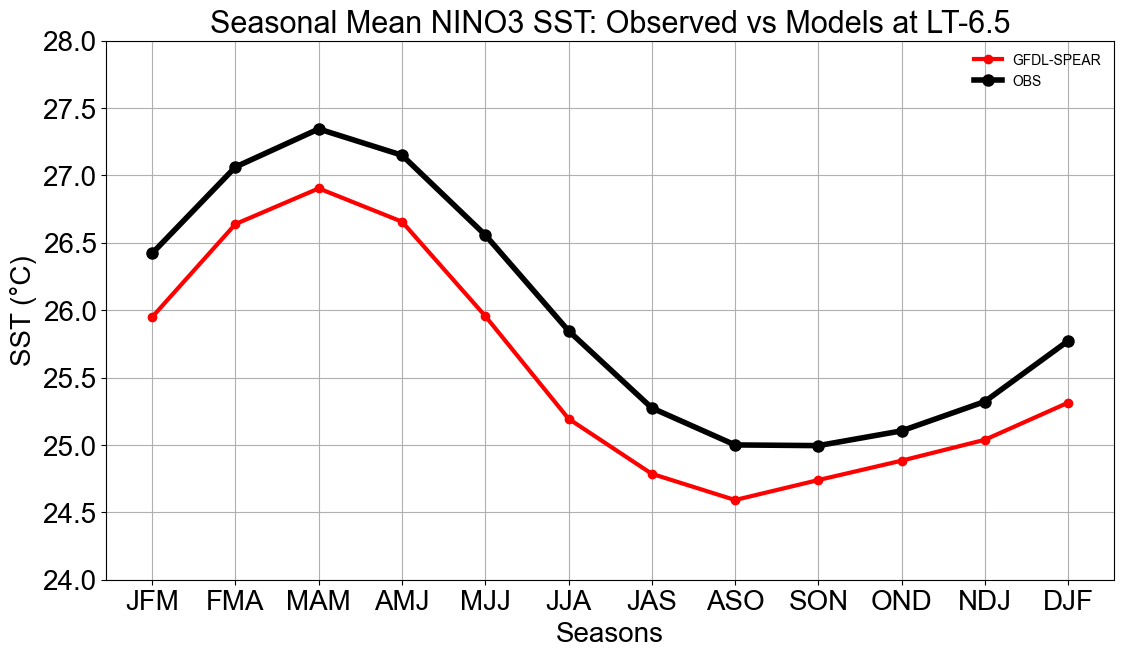

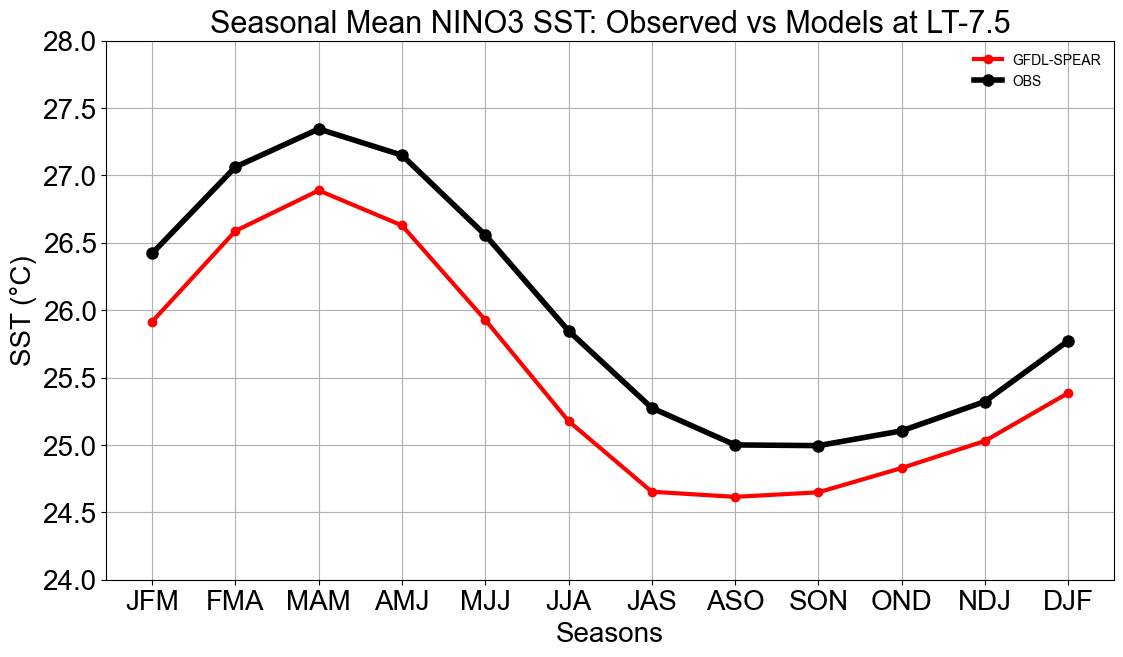

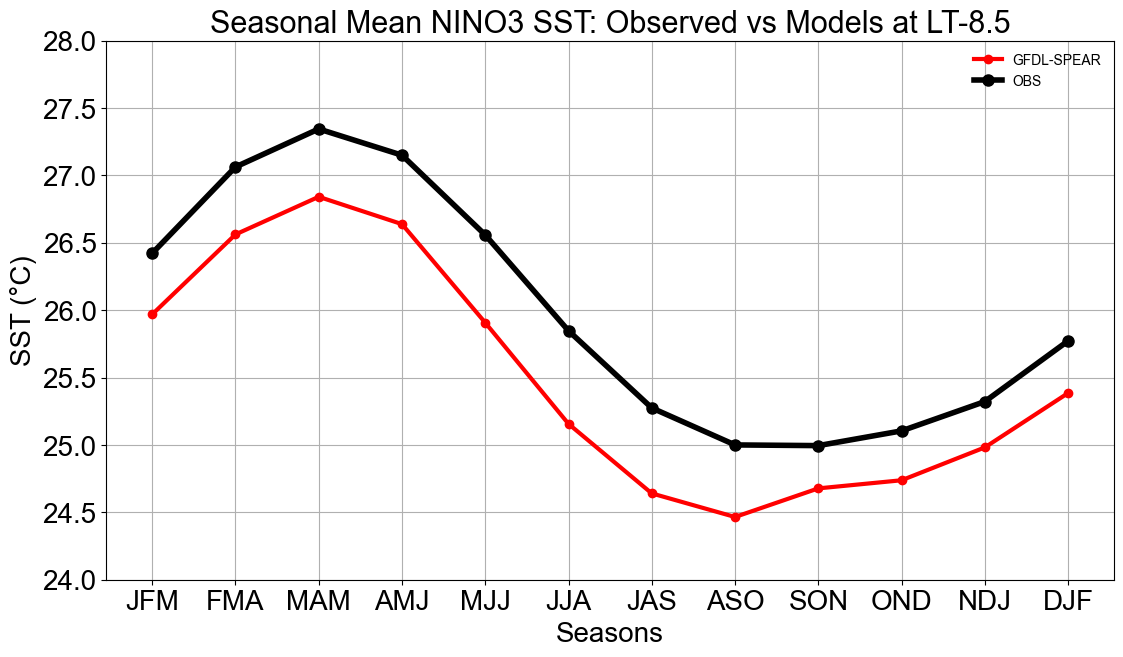

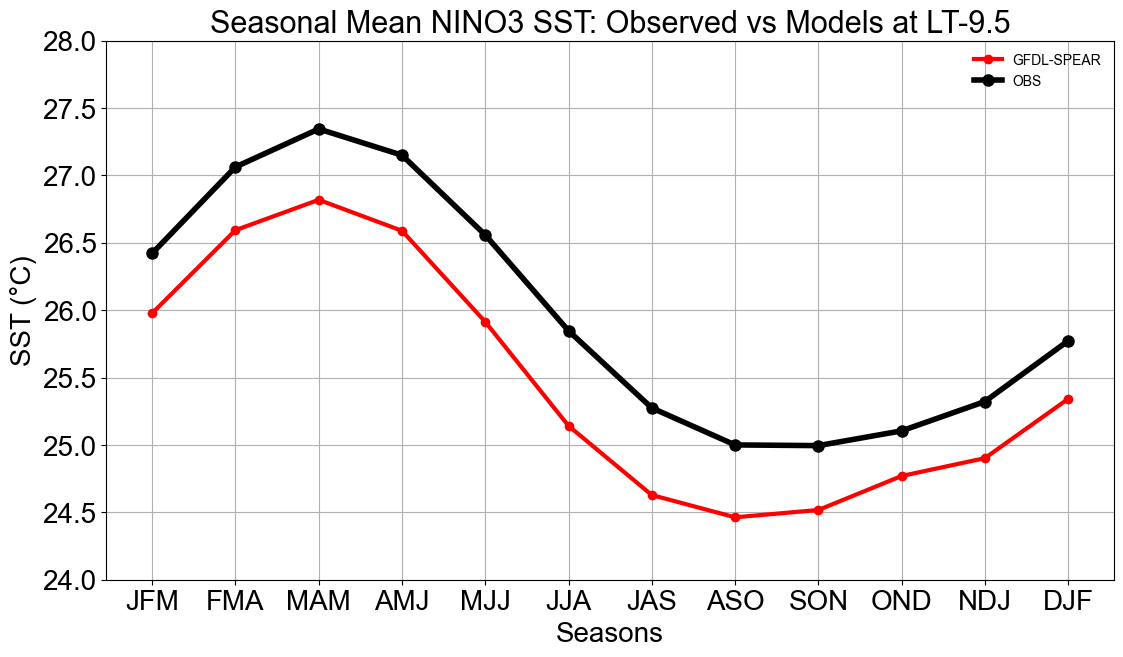

In [56]:
def multimodel_nino3_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=28)
    plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
i = 1
while i < 11:
    multimodel_nino3_visualizer('3', i)
    i += 1

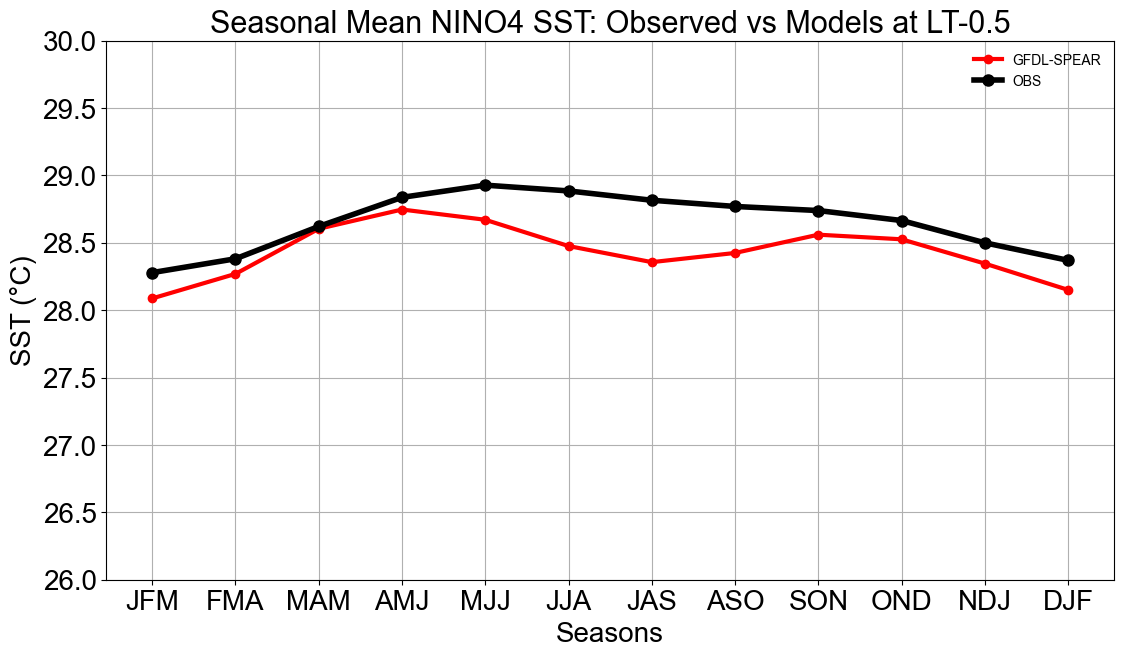

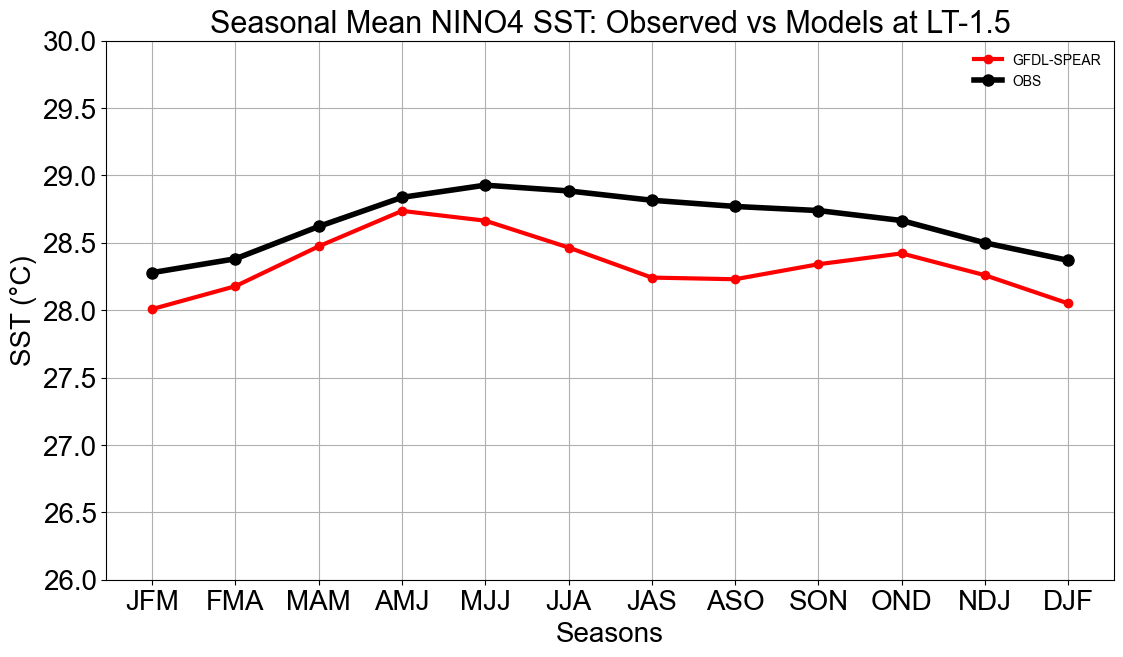

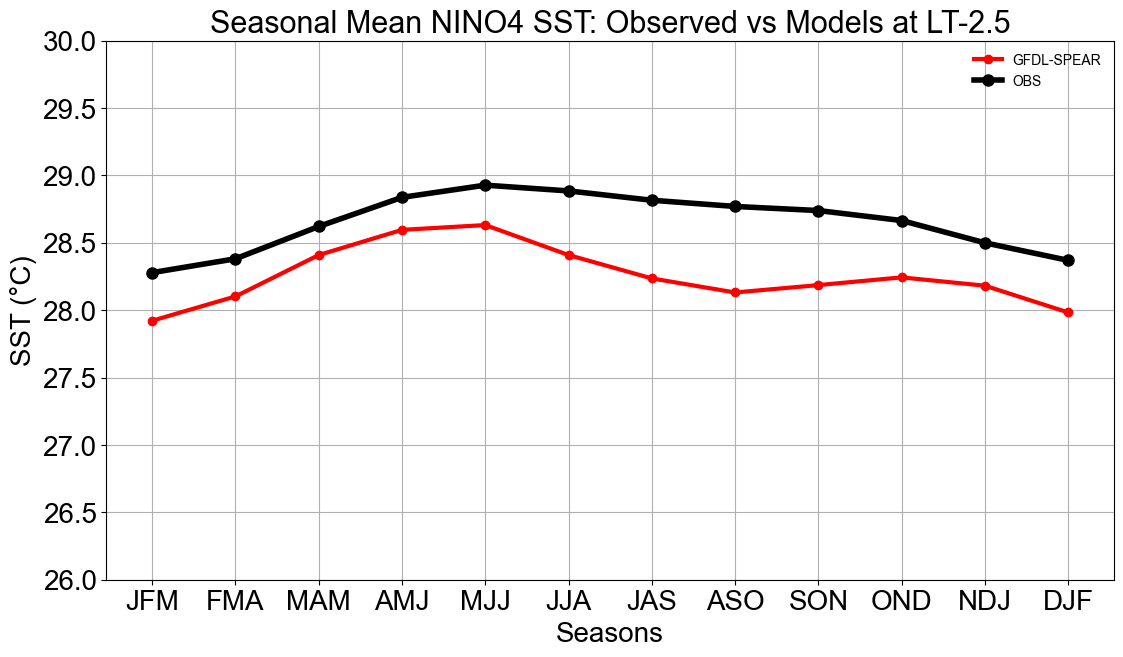

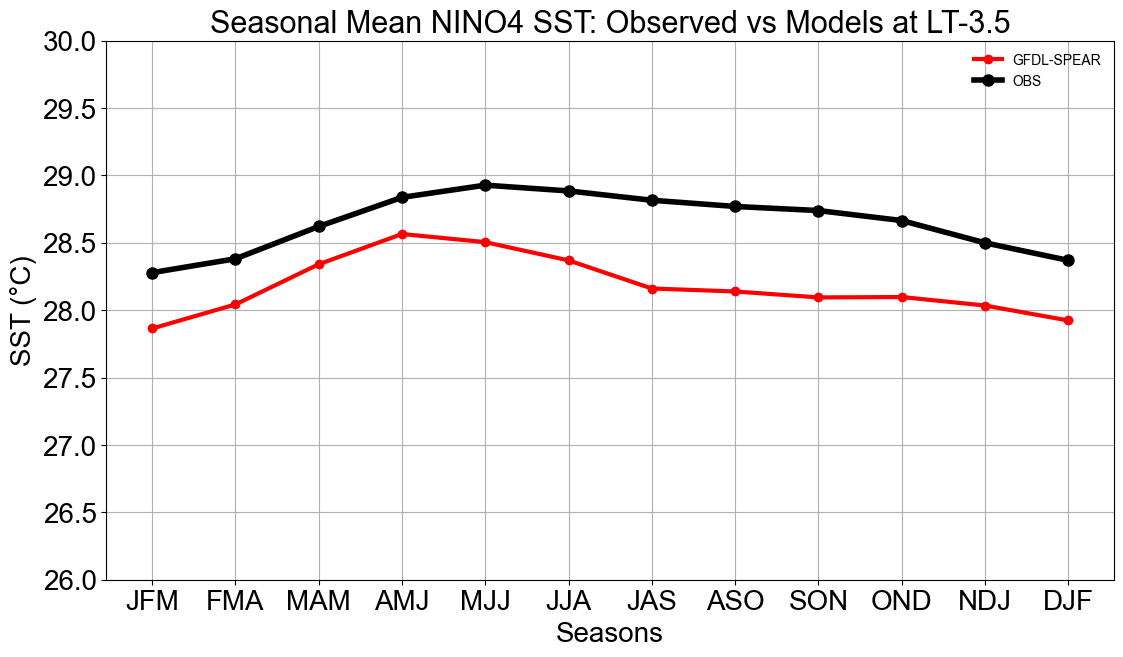

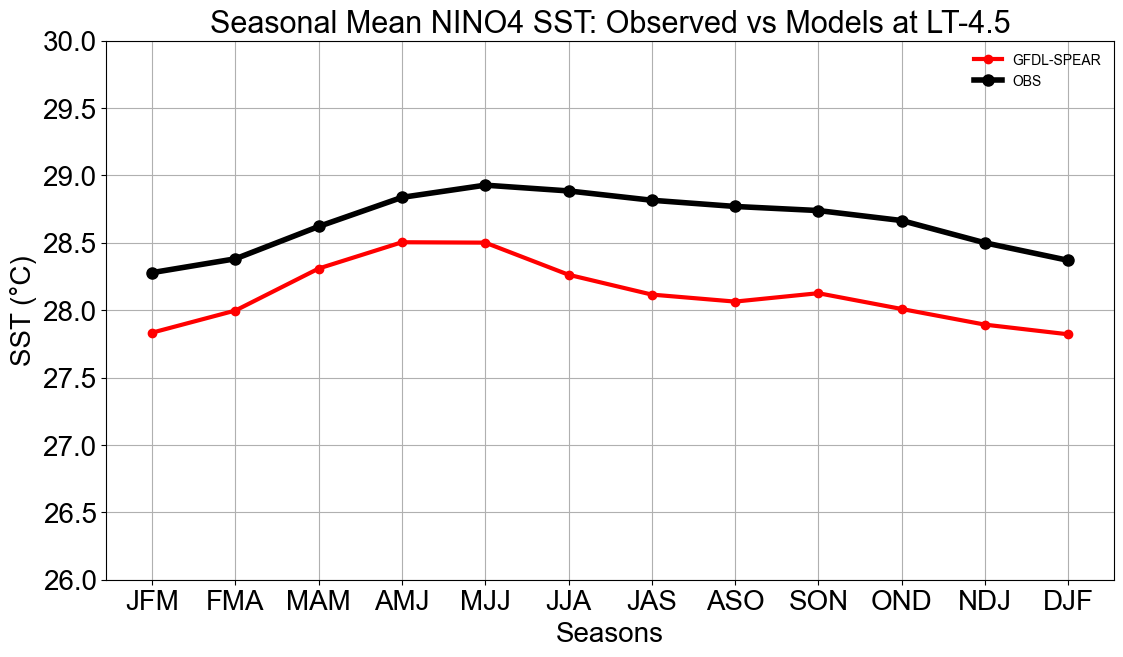

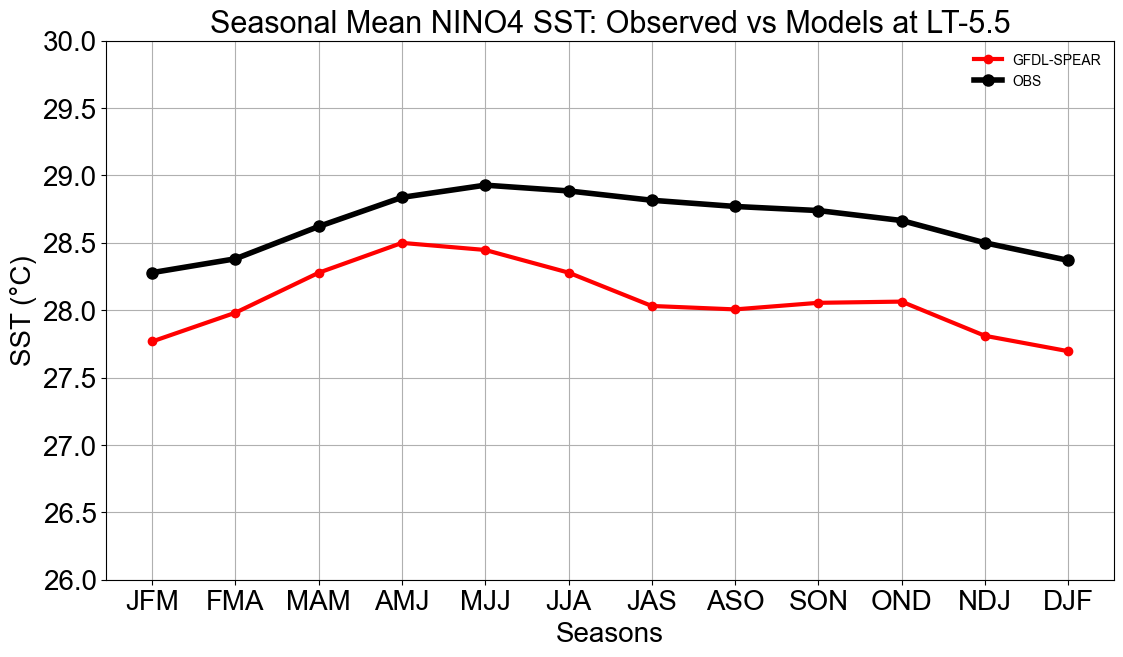

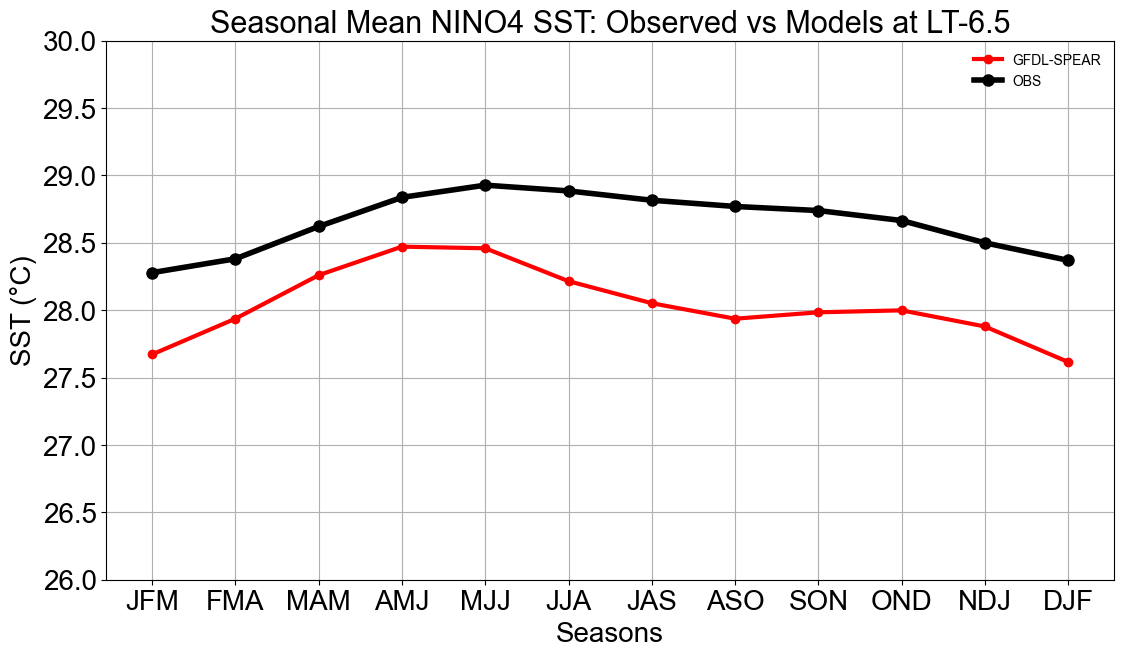

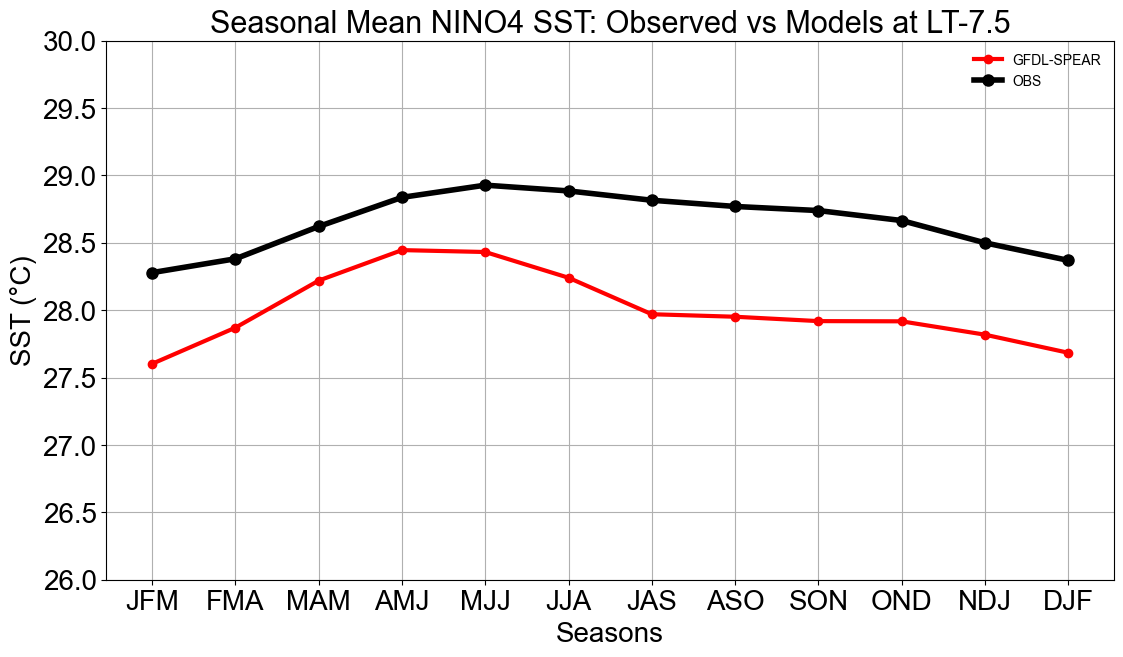

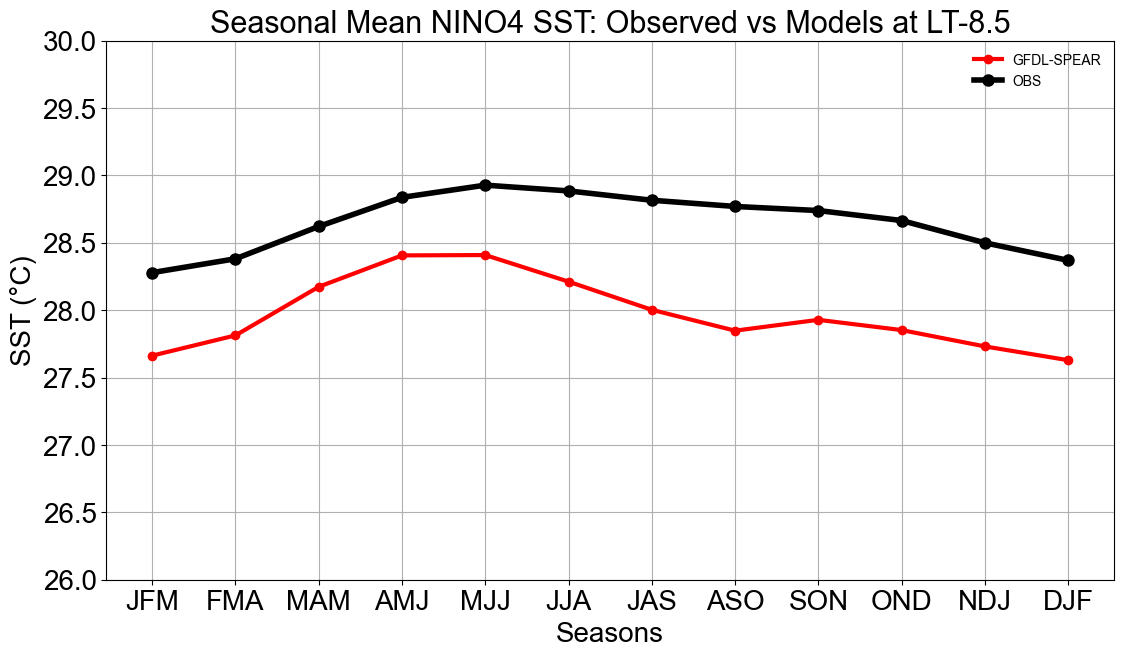

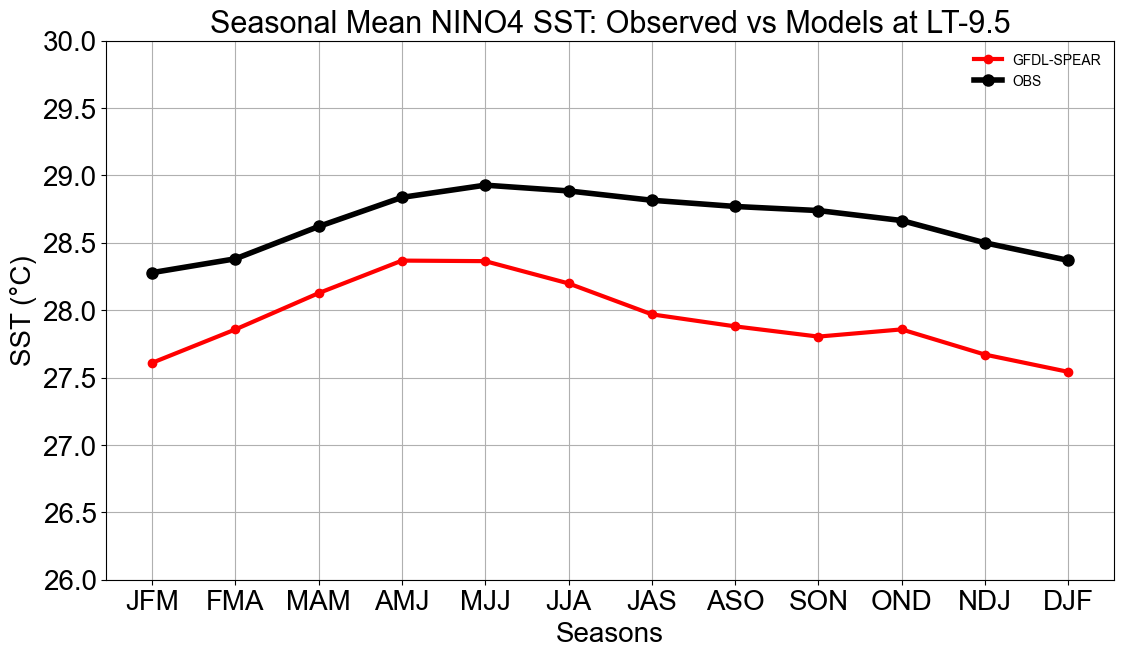

In [57]:
def multimodel_nino4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=26, ymax=30)
    plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
i = 1
while i < 11:
    multimodel_nino4_visualizer('4', i)
    i += 1

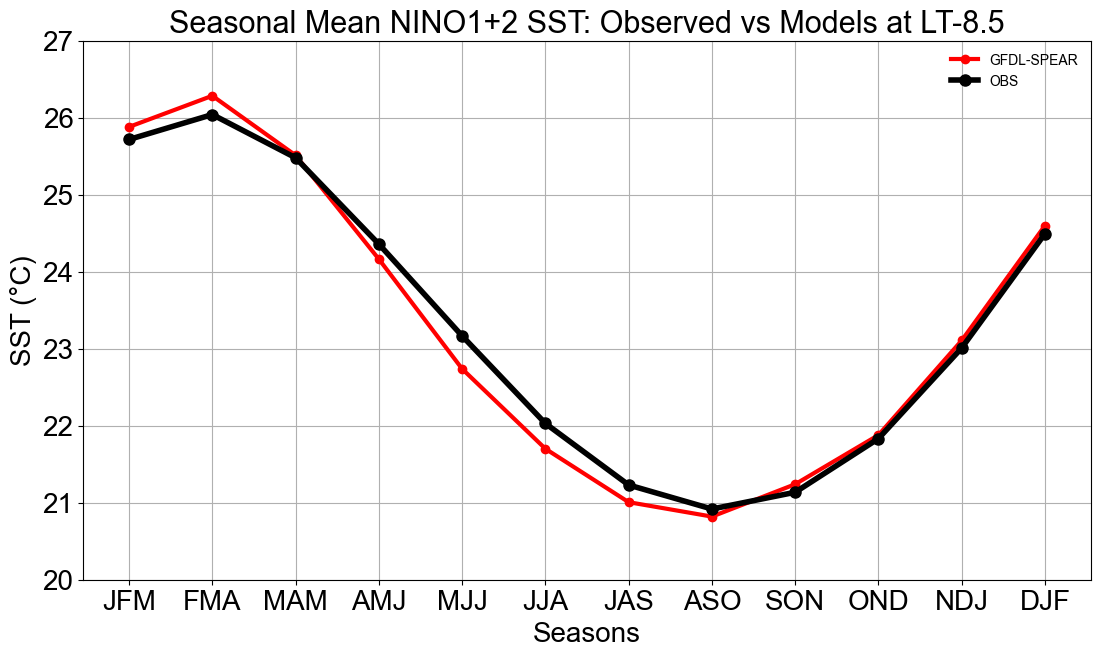

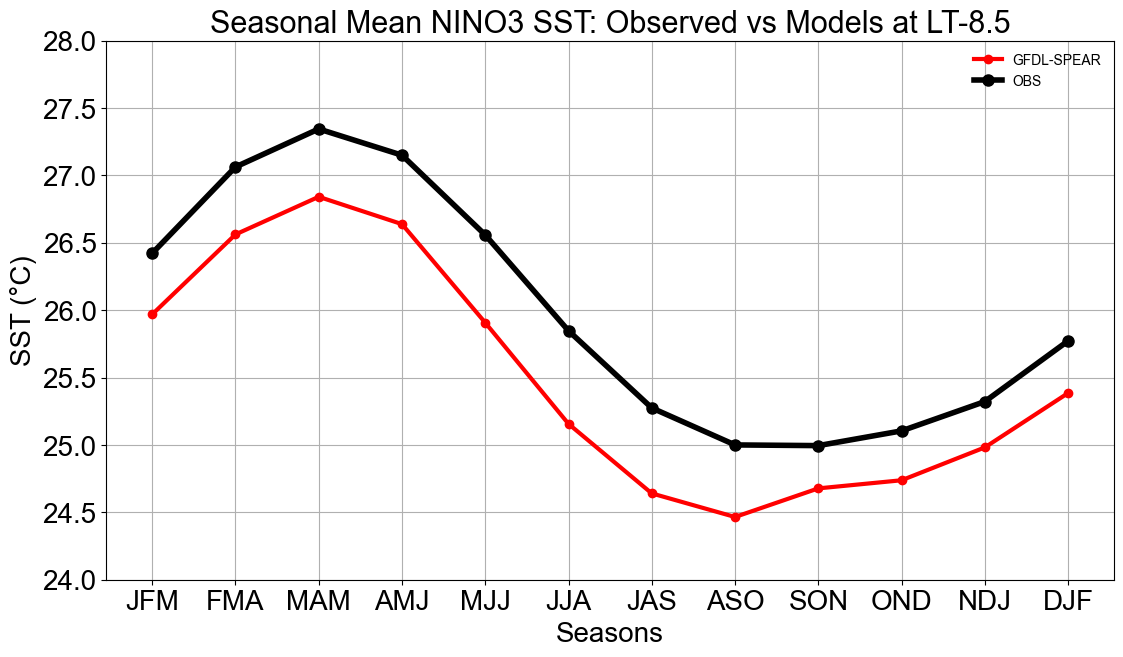

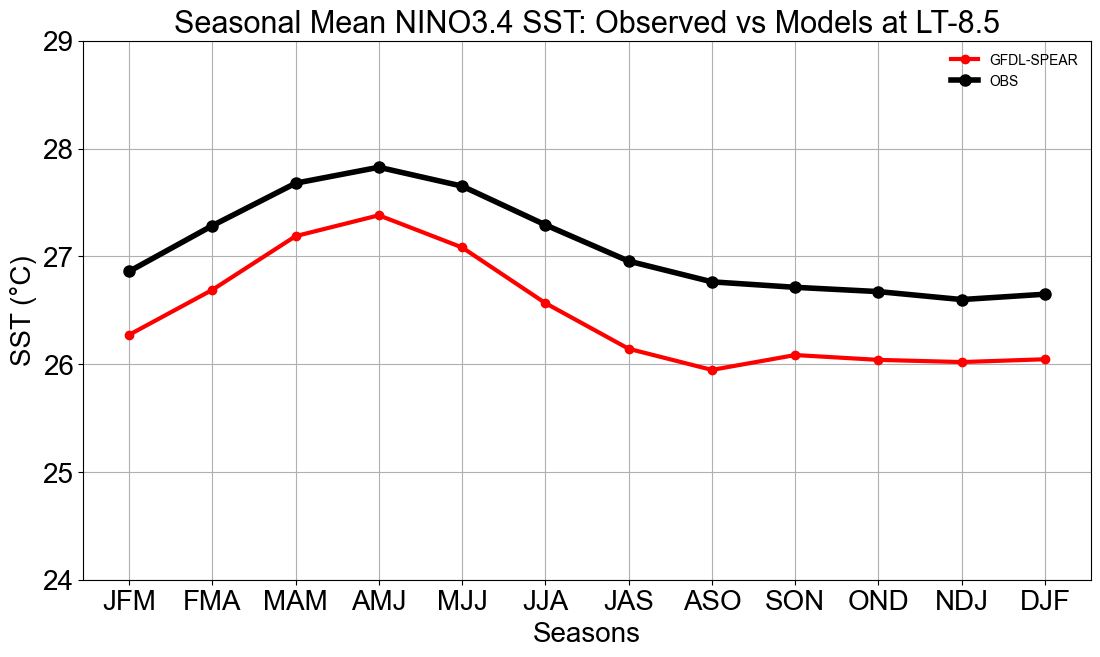

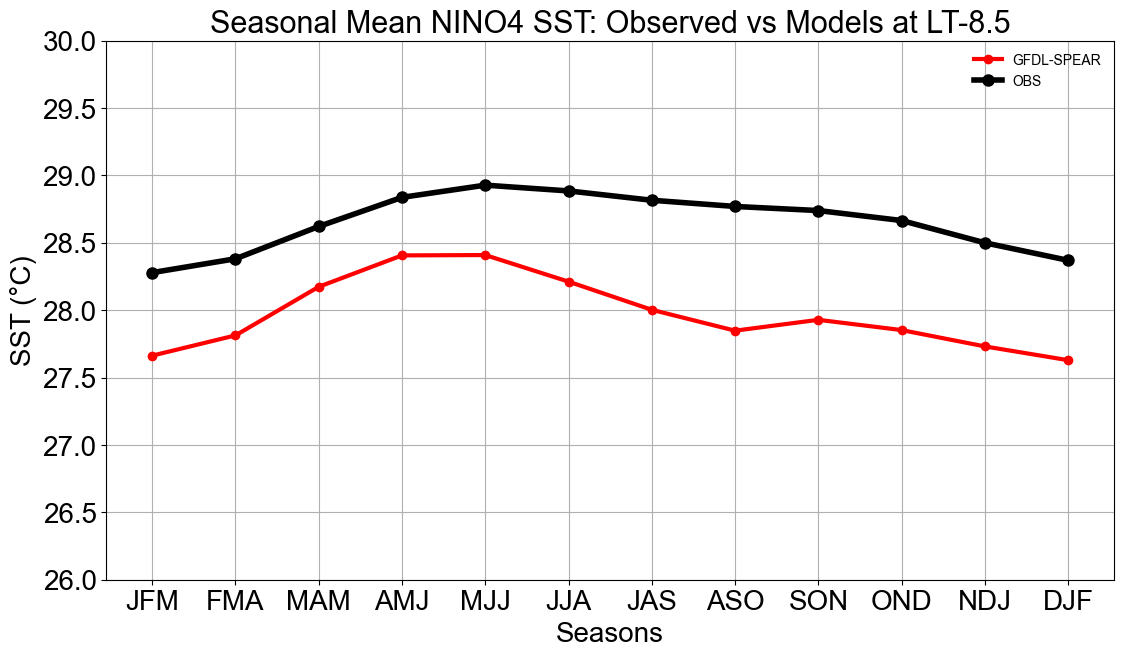

In [58]:
visualizer_functions = {
    '1+2': multimodel_nino1_2_visualizer,
    '3': multimodel_nino3_visualizer,
    '3.4': multimodel_nino3_4_visualizer,
    '4': multimodel_nino4_visualizer
}

# Higher-level function to call the appropriate visualizer function
def run_visualizer(region, lead):
    if region in visualizer_functions:
        visualizer_function = visualizer_functions[region]
        visualizer_function(region, lead)
    else:
        print(f"Error: Region {region} is not recognized. Valid regions are {list(visualizer_functions.keys())}.")

# Example usage
regions = ['1+2', '3', '3.4', '4']
lead = 9 

for region in regions:
    run_visualizer(region, lead)